In [1]:
%matplotlib notebook

import os
import glob
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import fitsio
import corner



In [2]:
# OptAtmo fits
#outpfile='/u/ec/roodman/kipacdisk/Piff/y1_500_i_shape_mode_round2_fitparams.fits'
outpfile='/u/ec/roodman/kipacdisk/Piff/y1_500_i_shape_mode_nolincoma_fitparams.fits'


outp = fitsio.FITS(outpfile,'r')
varnames = outp['fitparams'].get_colnames()
print(varnames)
print(len(varnames))
t = outp['fitparams'].read()

['expnum', 'chi2', 'L0', 'error_L0', 'size', 'error_size', 'g1', 'error_g1', 'g2', 'error_g2', 'zPupil004_zFocal001', 'error_zPupil004_zFocal001', 'zPupil005_zFocal001', 'error_zPupil005_zFocal001', 'zPupil005_zFocal002', 'error_zPupil005_zFocal002', 'zPupil005_zFocal003', 'error_zPupil005_zFocal003', 'zPupil006_zFocal001', 'error_zPupil006_zFocal001', 'zPupil006_zFocal002', 'error_zPupil006_zFocal002', 'zPupil006_zFocal003', 'error_zPupil006_zFocal003', 'zPupil007_zFocal001', 'error_zPupil007_zFocal001', 'zPupil008_zFocal001', 'error_zPupil008_zFocal001', 'zPupil009_zFocal001', 'error_zPupil009_zFocal001', 'zPupil010_zFocal001', 'error_zPupil010_zFocal001', 'zPupil011_zFocal001', 'error_zPupil011_zFocal001', 'zPupil014_zFocal001', 'error_zPupil014_zFocal001', 'zPupil015_zFocal001', 'error_zPupil015_zFocal001']
38


In [3]:
print(t[0])
print(t.dtype)
print(t['expnum'])

(228724, 237.56336884, 8.30213813, 0.46133612, 1.10049033, 0.00010641, -0.00872641, 2.84977523e-05, -0.00622397, 3.75089244e-05, -0.14772294, 0.00233817, -0.30332722, 0.00247932, -0.0332951, 0.00091382, -0.09290861, 0.00093992, 0.07726783, 0.00268949, -0.00638517, 0.00094069, 0.03495026, 0.00105888, 0.3948024, 0.00041362, 0.14026703, 0.0003947, 0.13375095, 0.000597, 0.01348565, 0.00062313, -0.08138266, 0.00082595, -0.0217401, 0.00145487, -0.03305064, 0.00104144)
[('expnum', '>i8'), ('chi2', '>f8'), ('L0', '>f8'), ('error_L0', '>f8'), ('size', '>f8'), ('error_size', '>f8'), ('g1', '>f8'), ('error_g1', '>f8'), ('g2', '>f8'), ('error_g2', '>f8'), ('zPupil004_zFocal001', '>f8'), ('error_zPupil004_zFocal001', '>f8'), ('zPupil005_zFocal001', '>f8'), ('error_zPupil005_zFocal001', '>f8'), ('zPupil005_zFocal002', '>f8'), ('error_zPupil005_zFocal002', '>f8'), ('zPupil005_zFocal003', '>f8'), ('error_zPupil005_zFocal003', '>f8'), ('zPupil006_zFocal001', '>f8'), ('error_zPupil006_zFocal001', '>f8')

<IPython.core.display.Javascript object>


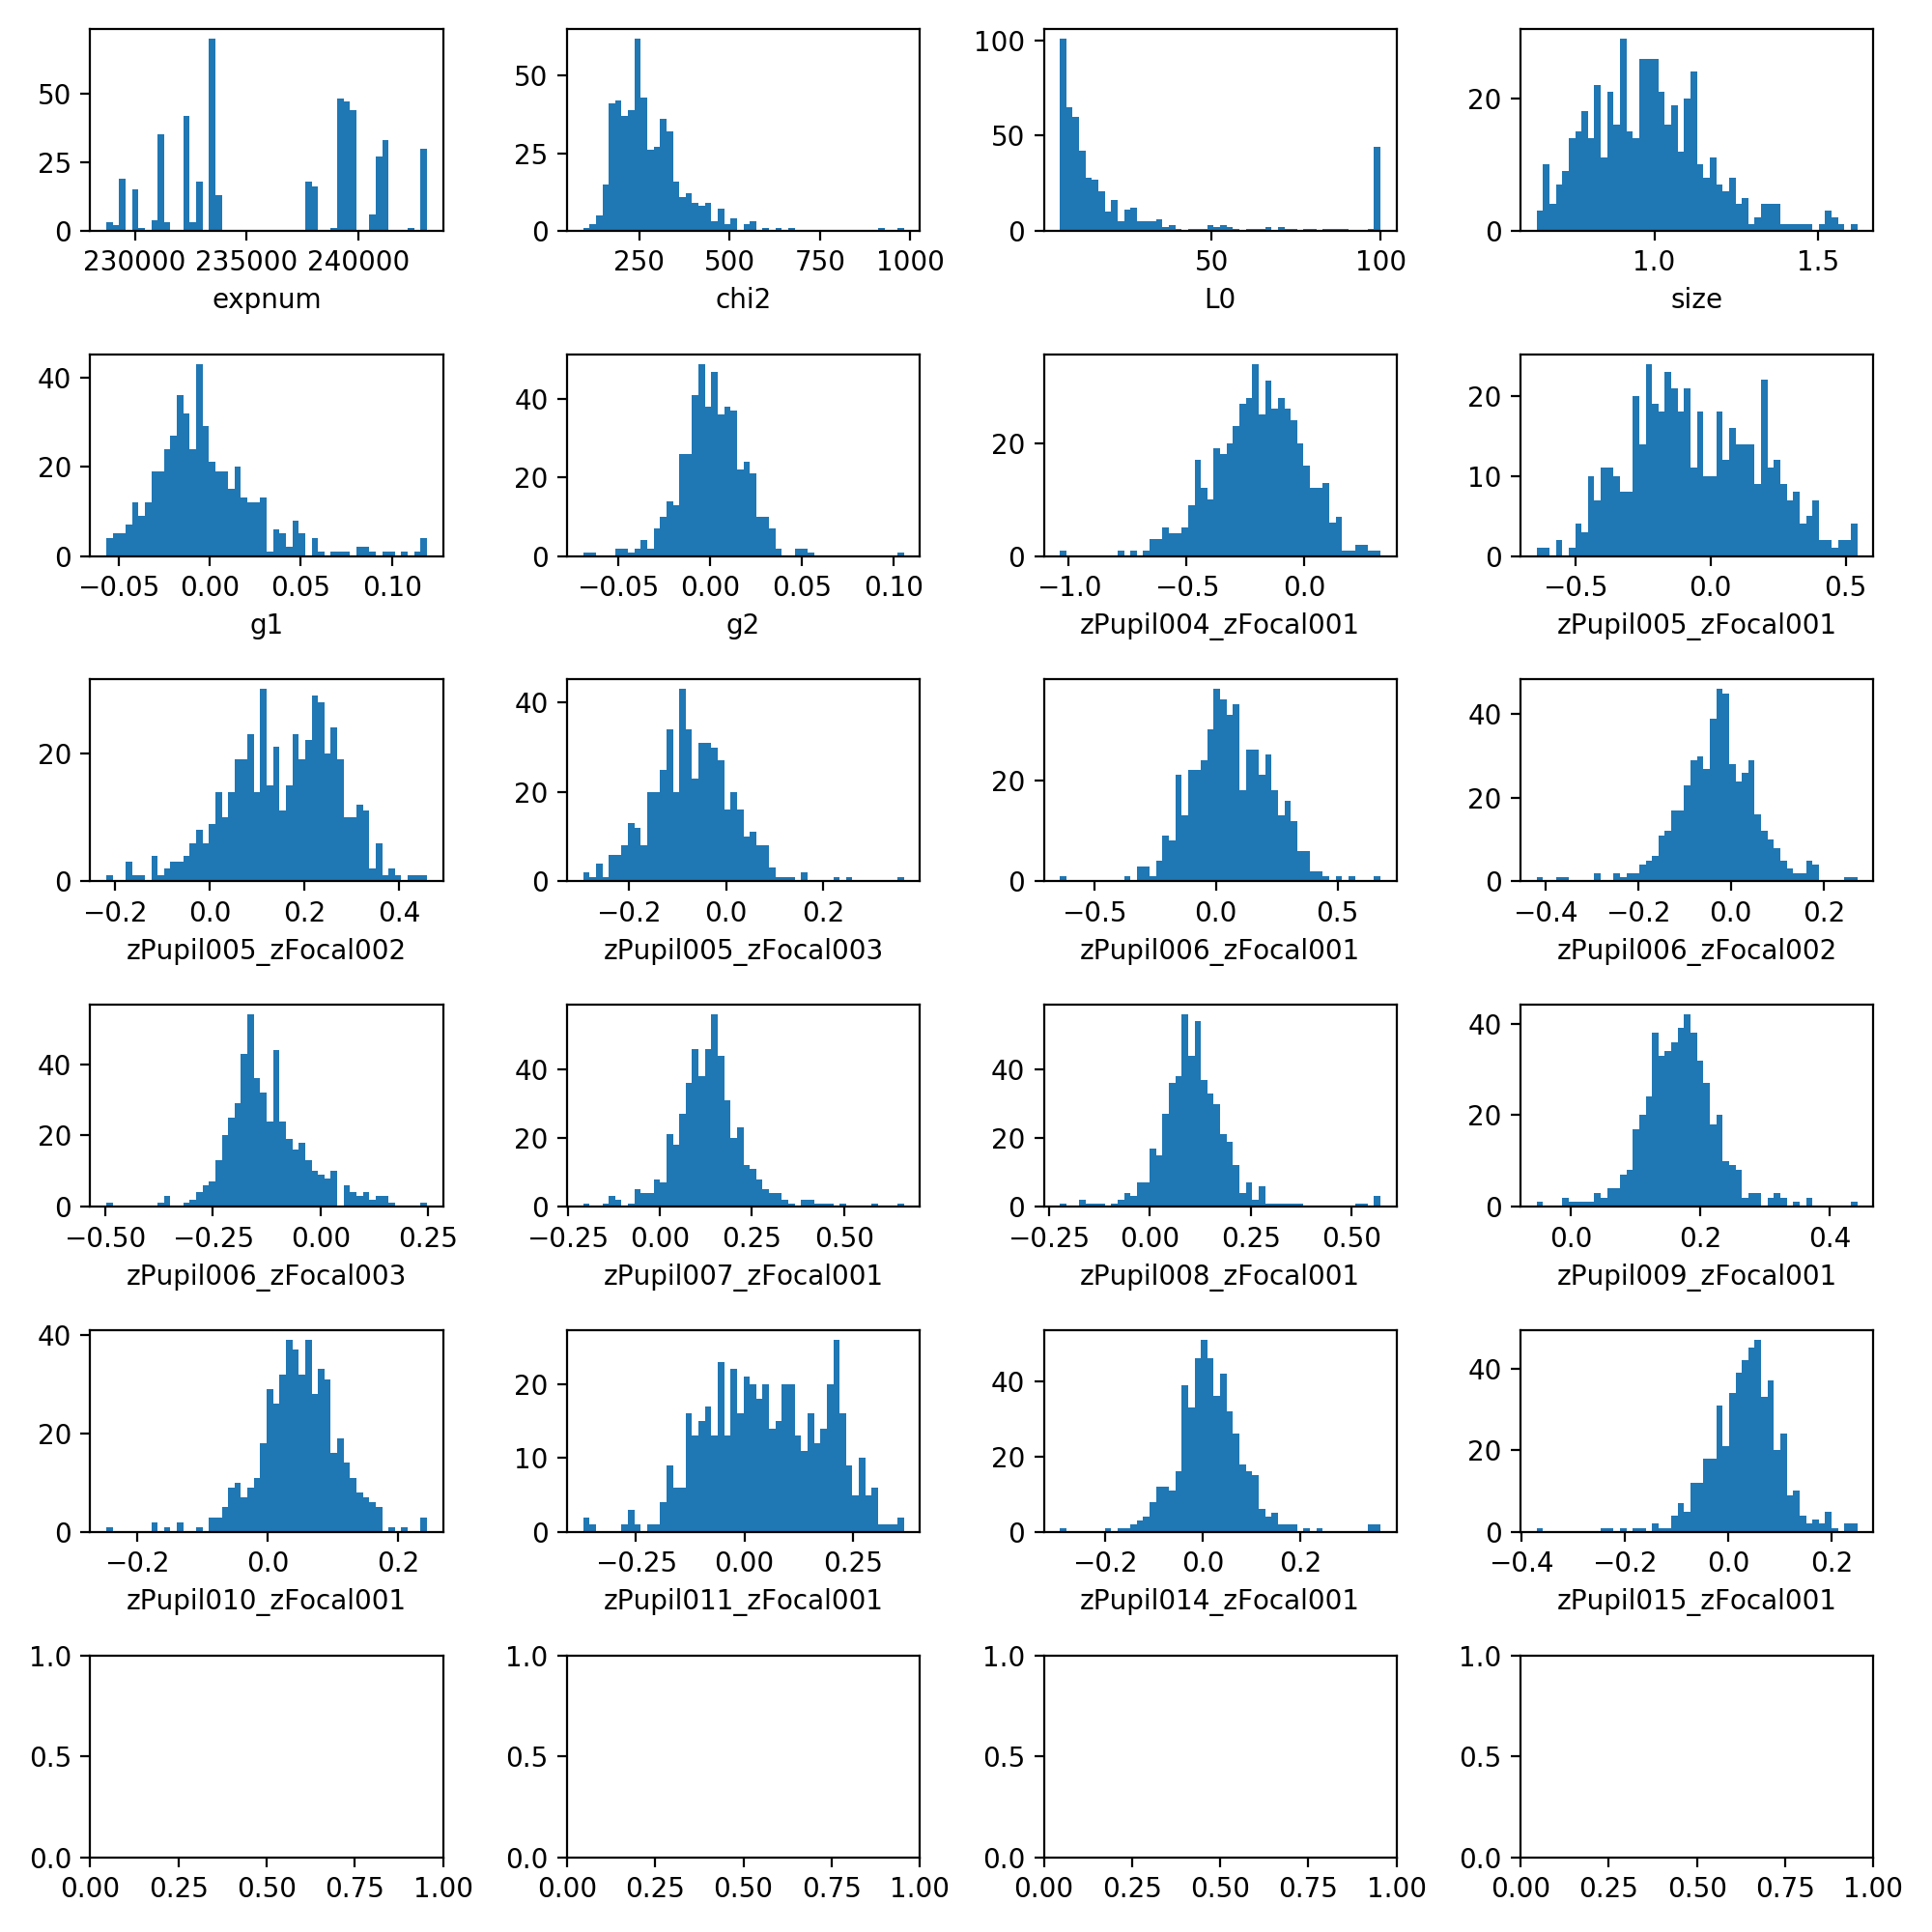

In [4]:
# plots
f,axa = plt.subplots(6,4,figsize=(10,10))
ax = axa.flatten()

i = 0
for avar in varnames:
    if not 'error' in avar:
        h = ax[i].hist(t[avar],bins=50)
        ax[i].set_xlabel(avar)
        i = i + 1
    
f.tight_layout()

<IPython.core.display.Javascript object>


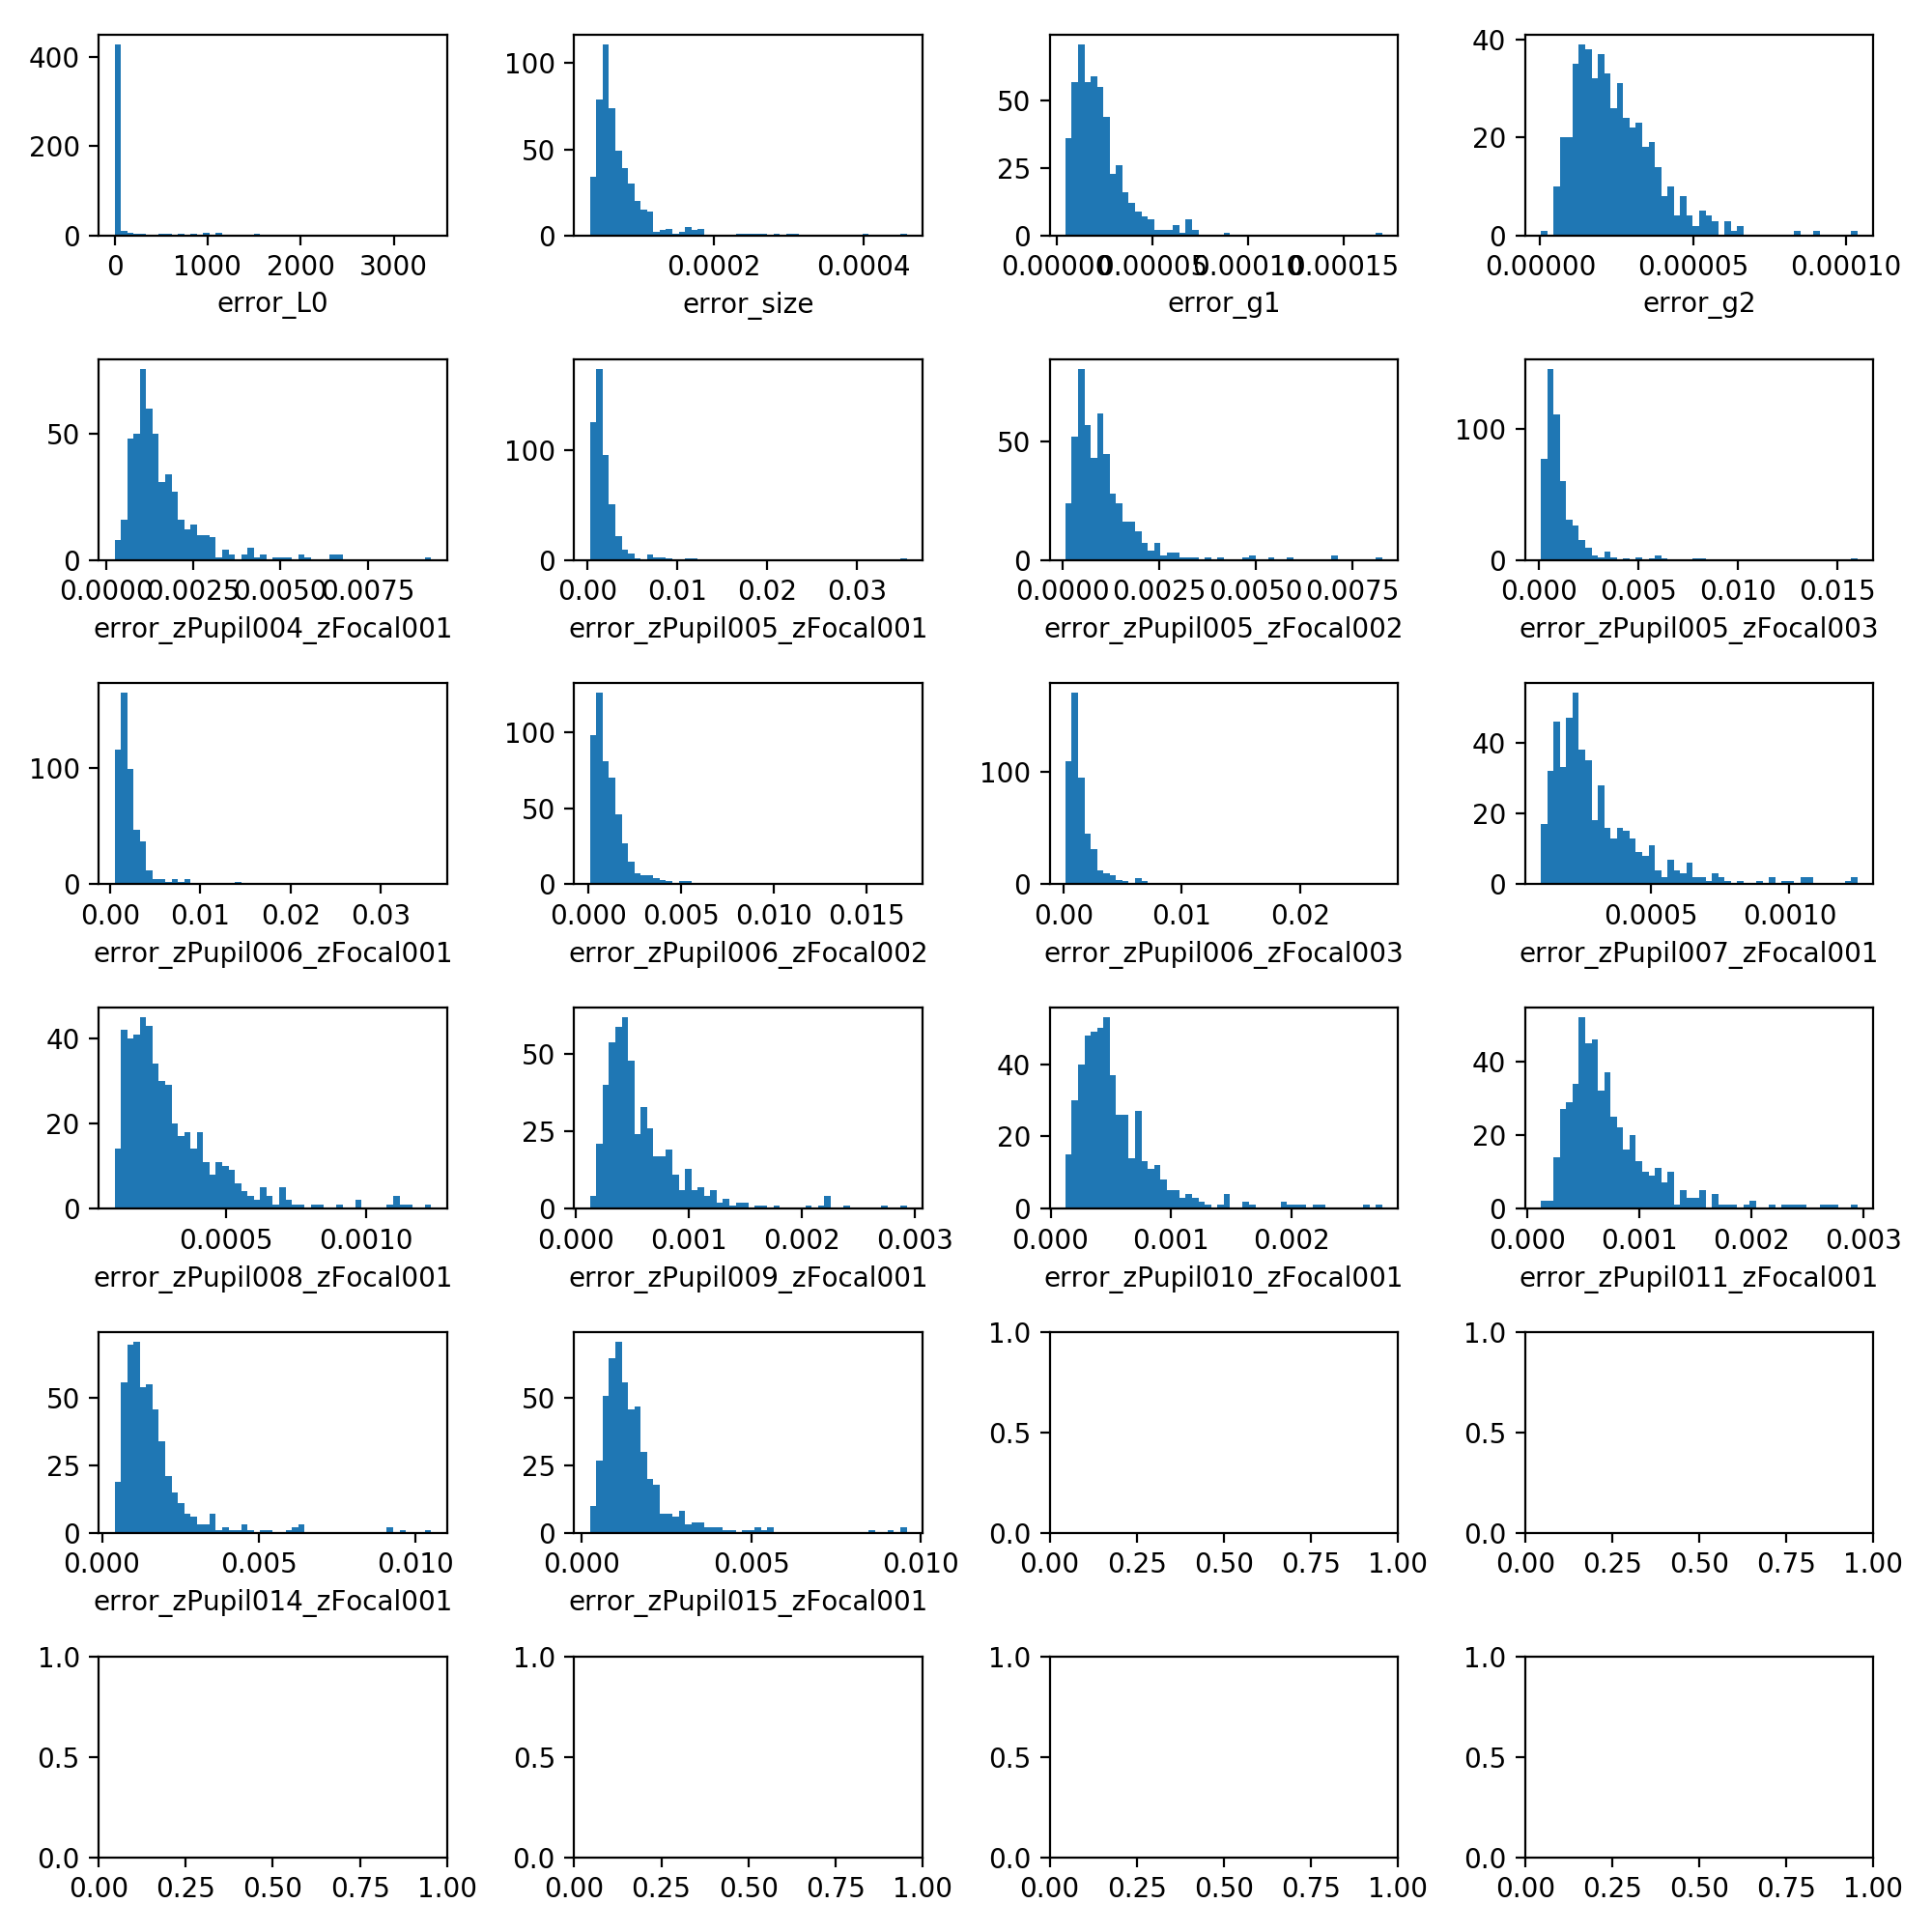

In [5]:
# plots
f,axa = plt.subplots(6,4,figsize=(10,10))
ax = axa.flatten()

i = 0
for avar in varnames:
    if 'error' in avar:
        h = ax[i].hist(t[avar],bins=50)
        ax[i].set_xlabel(avar)
        i = i + 1
    
f.tight_layout()

In [6]:
# AOS offline fits with floating r0
aosfile = '/nfs/slac/g/ki/ki06/roodman/CtioDB/donuts-v20i2-sorted.csv'
aosdata = pd.read_csv(aosfile)

In [7]:
print(aosdata.columns[0:100])
print(len(aosdata))

Index(['expid', 'doffrdodx', 'doffrdody', 'doffrdodz', 'doffrdoxt',
       'doffrdoyt', 'doffrdodxerr', 'doffrdodyerr', 'doffrdodzerr',
       'doffrdoxterr', 'doffrdoyterr', 'doffrzdelta', 'doffrzthetax',
       'doffrzthetay', 'doffrzdeltaErr', 'doffrzthetaxErr', 'doffrzthetayErr',
       'doffrzmeanDeltaBefore', 'doffrzrmsDeltaBefore', 'doffrzmeanDeltaAfter',
       'doffrzrmsDeltaAfter', 'doffrz5delta', 'doffrz5thetax', 'doffrz5thetay',
       'doffrz5deltaErr', 'doffrz5thetaxErr', 'doffrz5thetayErr',
       'doffrz5meanDeltaBefore', 'doffrz5rmsDeltaBefore',
       'doffrz5meanDeltaAfter', 'doffrz5rmsDeltaAfter', 'doffrz6delta',
       'doffrz6thetax', 'doffrz6thetay', 'doffrz6deltaErr', 'doffrz6thetaxErr',
       'doffrz6thetayErr', 'doffrz6meanDeltaBefore', 'doffrz6rmsDeltaBefore',
       'doffrz6meanDeltaAfter', 'doffrz6rmsDeltaAfter', 'doffrz7delta',
       'doffrz7thetax', 'doffrz7thetay', 'doffrz7deltaErr', 'doffrz7thetaxErr',
       'doffrz7thetayErr', 'doffrz7meanDeltaBefor

In [8]:
# get aosdata for just the exposures fitted with Piff
piff_expnum = t['expnum'].tolist()
aosonly = aosdata[aosdata['expid'].isin(piff_expnum)]
print(len(aosonly))

496


In [9]:
# convert fits table to a Pandas DF
newt = t.byteswap().newbyteorder()
piffonly = pd.DataFrame(newt)
print(piffonly['expnum'])

0      228724
1      228728
2      228730
3      229287
4      229296
        ...  
494    242881
495    243038
496    243044
497    243046
498    243053
Name: expnum, Length: 499, dtype: int64


In [10]:
# compare z4delta
naos = len(aosonly['expid'])
npiff = len(piffonly['expnum'])

z4daos = []
z4dpiff = []

for i in range(naos):
    
    expid = aosonly['expid'].iloc[i]
    thisone = (piffonly['expnum']==expid)
    thispiff = piffonly[thisone]
    
    doffrzdelta = aosonly['doffrzdelta'].iloc[i]
    zPupil004_zFocal001 = thispiff['zPupil004_zFocal001'].iloc[0]

    z4daos.append(doffrzdelta)
    z4dpiff.append(zPupil004_zFocal001)
        
    



<IPython.core.display.Javascript object>


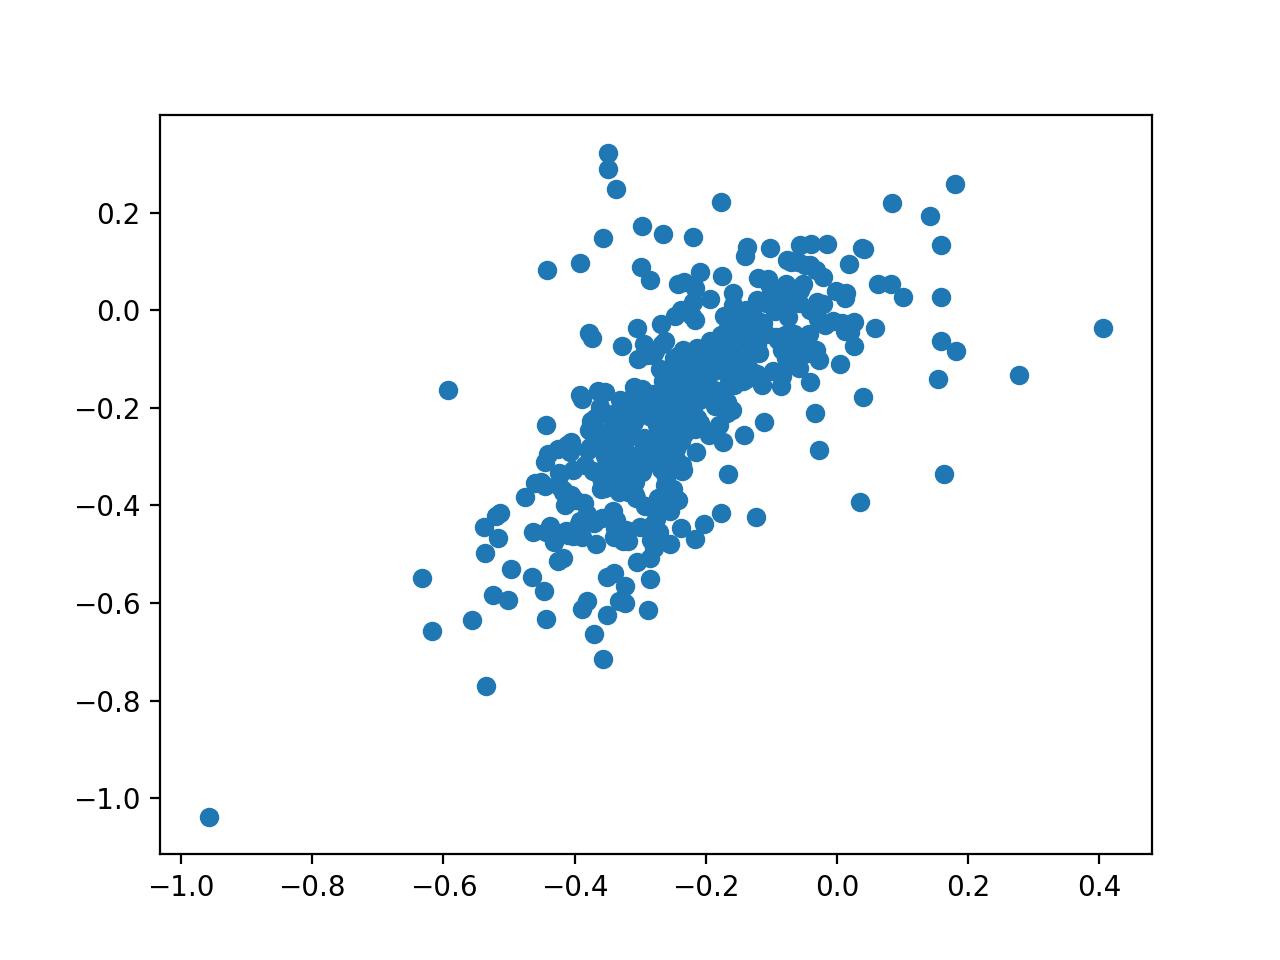

In [11]:
f,ax = plt.subplots(1,1)
ax.scatter(np.array(z4daos)*8.7/1500.,z4dpiff)

In [12]:
# join the dataframes
aospiff = pd.merge(aosonly,piffonly,how='inner',left_on='expid',right_on='expnum',sort=True,copy=True)


In [13]:
print(aospiff.columns[0:100])
print(aospiff.columns[100:200])

Index(['expid', 'doffrdodx', 'doffrdody', 'doffrdodz', 'doffrdoxt',
       'doffrdoyt', 'doffrdodxerr', 'doffrdodyerr', 'doffrdodzerr',
       'doffrdoxterr', 'doffrdoyterr', 'doffrzdelta', 'doffrzthetax',
       'doffrzthetay', 'doffrzdeltaErr', 'doffrzthetaxErr', 'doffrzthetayErr',
       'doffrzmeanDeltaBefore', 'doffrzrmsDeltaBefore', 'doffrzmeanDeltaAfter',
       'doffrzrmsDeltaAfter', 'doffrz5delta', 'doffrz5thetax', 'doffrz5thetay',
       'doffrz5deltaErr', 'doffrz5thetaxErr', 'doffrz5thetayErr',
       'doffrz5meanDeltaBefore', 'doffrz5rmsDeltaBefore',
       'doffrz5meanDeltaAfter', 'doffrz5rmsDeltaAfter', 'doffrz6delta',
       'doffrz6thetax', 'doffrz6thetay', 'doffrz6deltaErr', 'doffrz6thetaxErr',
       'doffrz6thetayErr', 'doffrz6meanDeltaBefore', 'doffrz6rmsDeltaBefore',
       'doffrz6meanDeltaAfter', 'doffrz6rmsDeltaAfter', 'doffrz7delta',
       'doffrz7thetax', 'doffrz7thetay', 'doffrz7deltaErr', 'doffrz7thetaxErr',
       'doffrz7thetayErr', 'doffrz7meanDeltaBefor

<IPython.core.display.Javascript object>


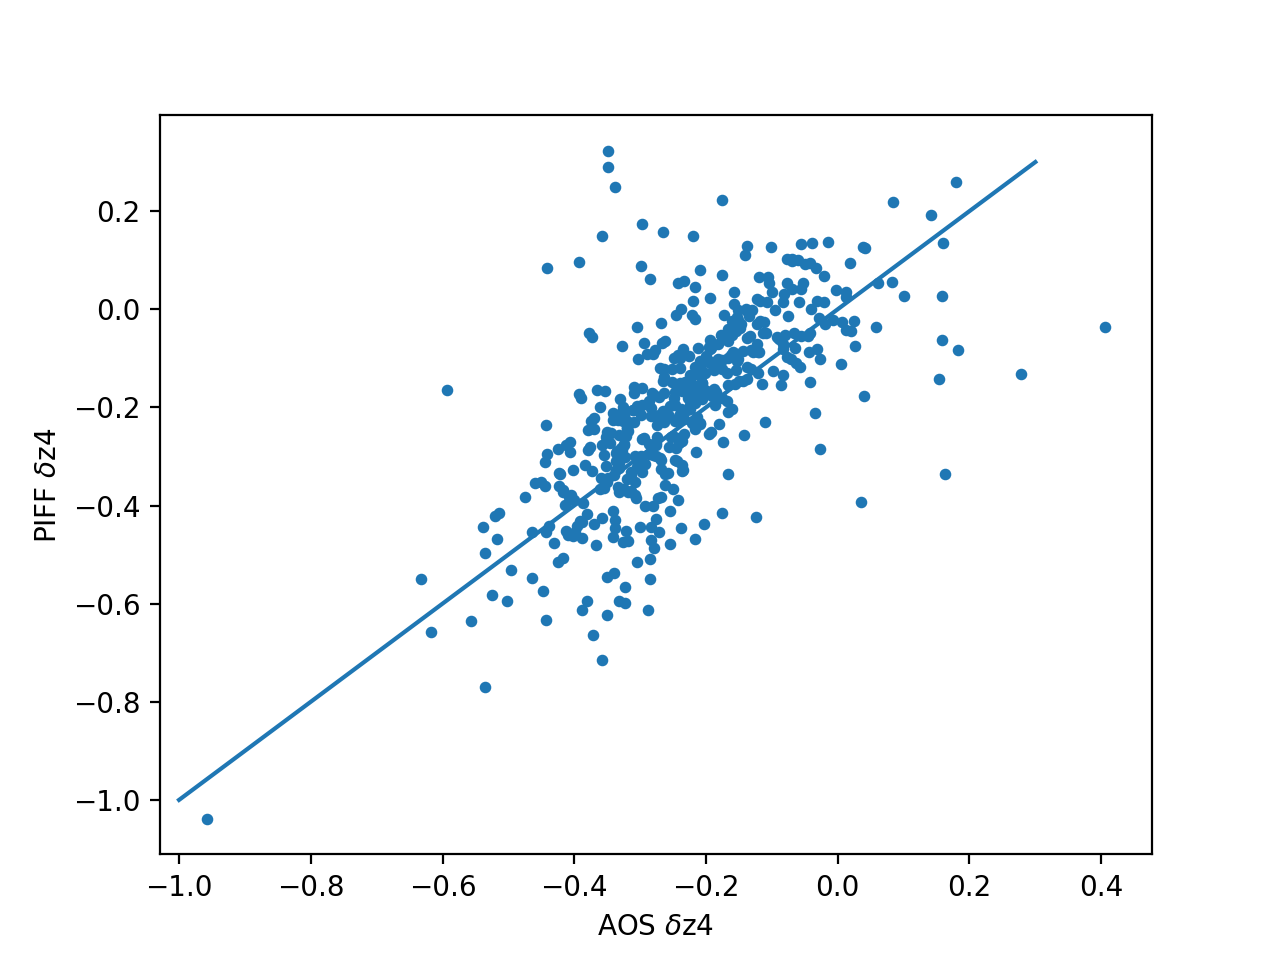

In [14]:
f,ax = plt.subplots(1,1)
ax.scatter(aospiff['doffrzdelta']*8.7/1500.,aospiff['zPupil004_zFocal001'],marker='o',s=10.)
ax.set_xlabel("AOS $\delta$z4")
ax.set_ylabel("PIFF $\delta$z4")

import matplotlib.lines as mlines
l = mlines.Line2D([-1.,0.3], [-1.,0.3])
ax.add_line(l)


<IPython.core.display.Javascript object>


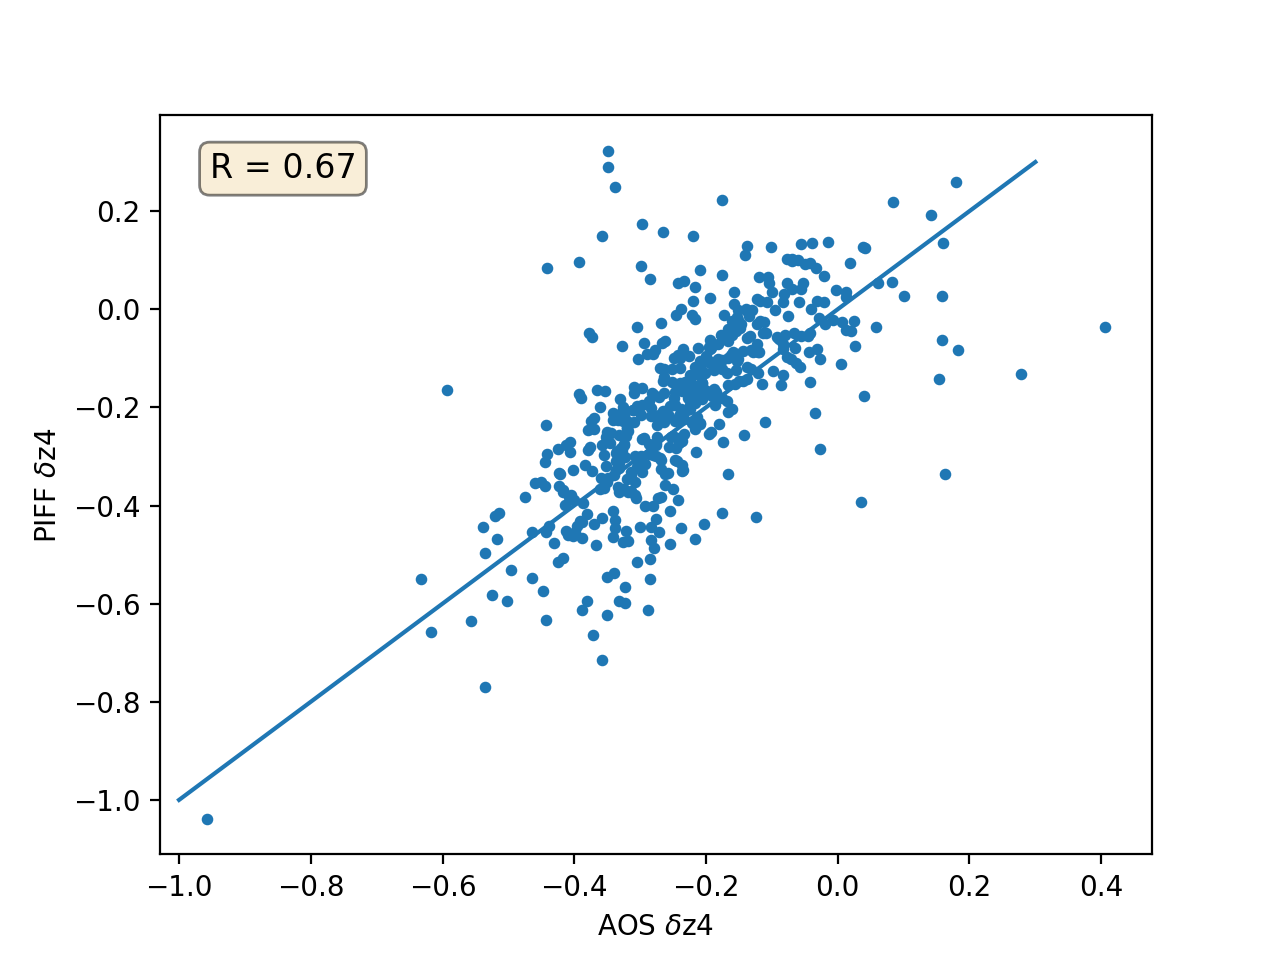

Text(0.05, 0.95, 'R = 0.67')

In [15]:
f,ax = plt.subplots(1,1)
xval = aospiff['doffrzdelta']*8.7/1500.
yval = aospiff['zPupil004_zFocal001']
ax.scatter(xval,yval,marker='o',s=10.)
ax.set_xlabel("AOS $\delta$z4")
ax.set_ylabel("PIFF $\delta$z4")

import matplotlib.lines as mlines
l = mlines.Line2D([-1.,0.3], [-1.,0.3])
ax.add_line(l)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)





<IPython.core.display.Javascript object>


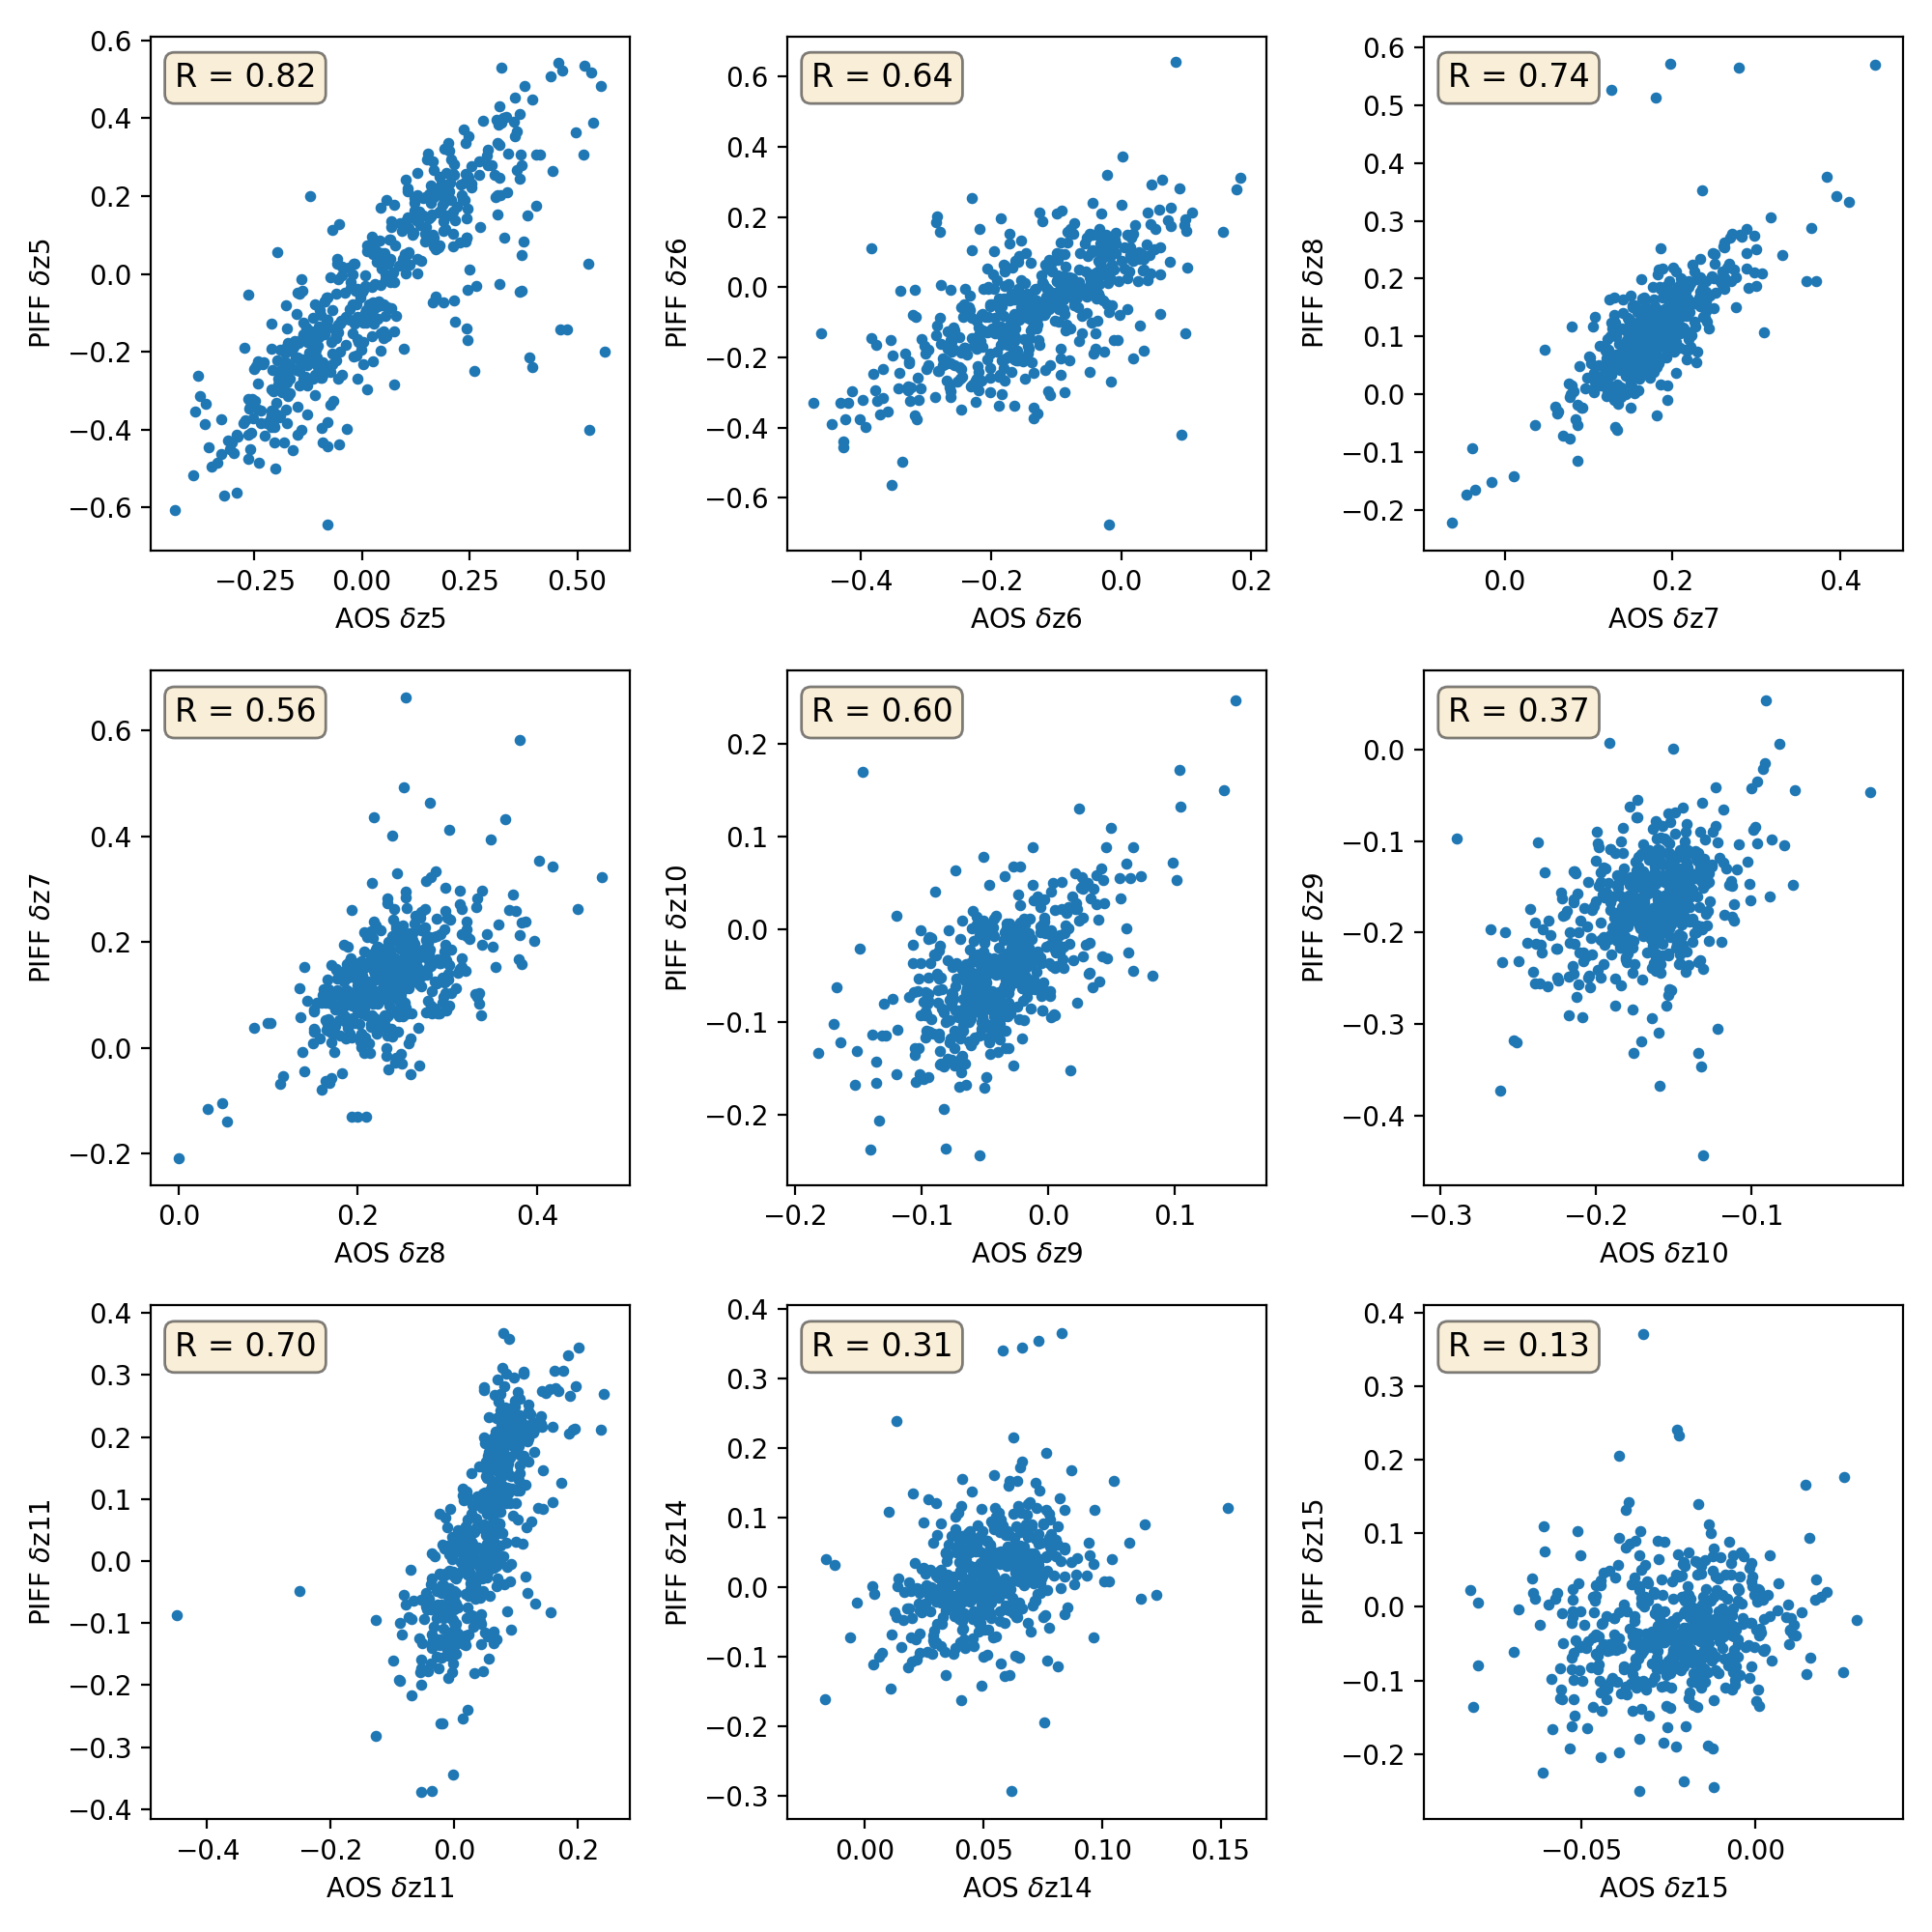

In [16]:
f,axa = plt.subplots(3,3,figsize=(10,10))
ax = axa.flatten()

zAOStoPIFF = {4:4,5:5,6:-6,7:8,8:7,9:-10,10:-9,11:11,14:14,15:-15}  # see CPD thesis

i = 0
for iZ in range(5,15+1):
   
    if not (iZ==12 or iZ==13):
        
        iZpiff = np.abs(zAOStoPIFF[iZ])
    
        if zAOStoPIFF[iZ]<0:
            factor = -1.
        else:
            factor = 1.
            
        xval = aospiff['doffrz%ddelta' % (iZ)]
        yval = factor*aospiff['zPupil%03d_zFocal001' % (iZpiff)]
        ax[i].scatter(xval,yval,marker='o',s=10.)
        ax[i].set_xlabel("AOS $\delta$z%d" % (iZ))
        ax[i].set_ylabel("PIFF $\delta$z%d" % (iZpiff))
        
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)

        i = i + 1
    
f.tight_layout()

<IPython.core.display.Javascript object>


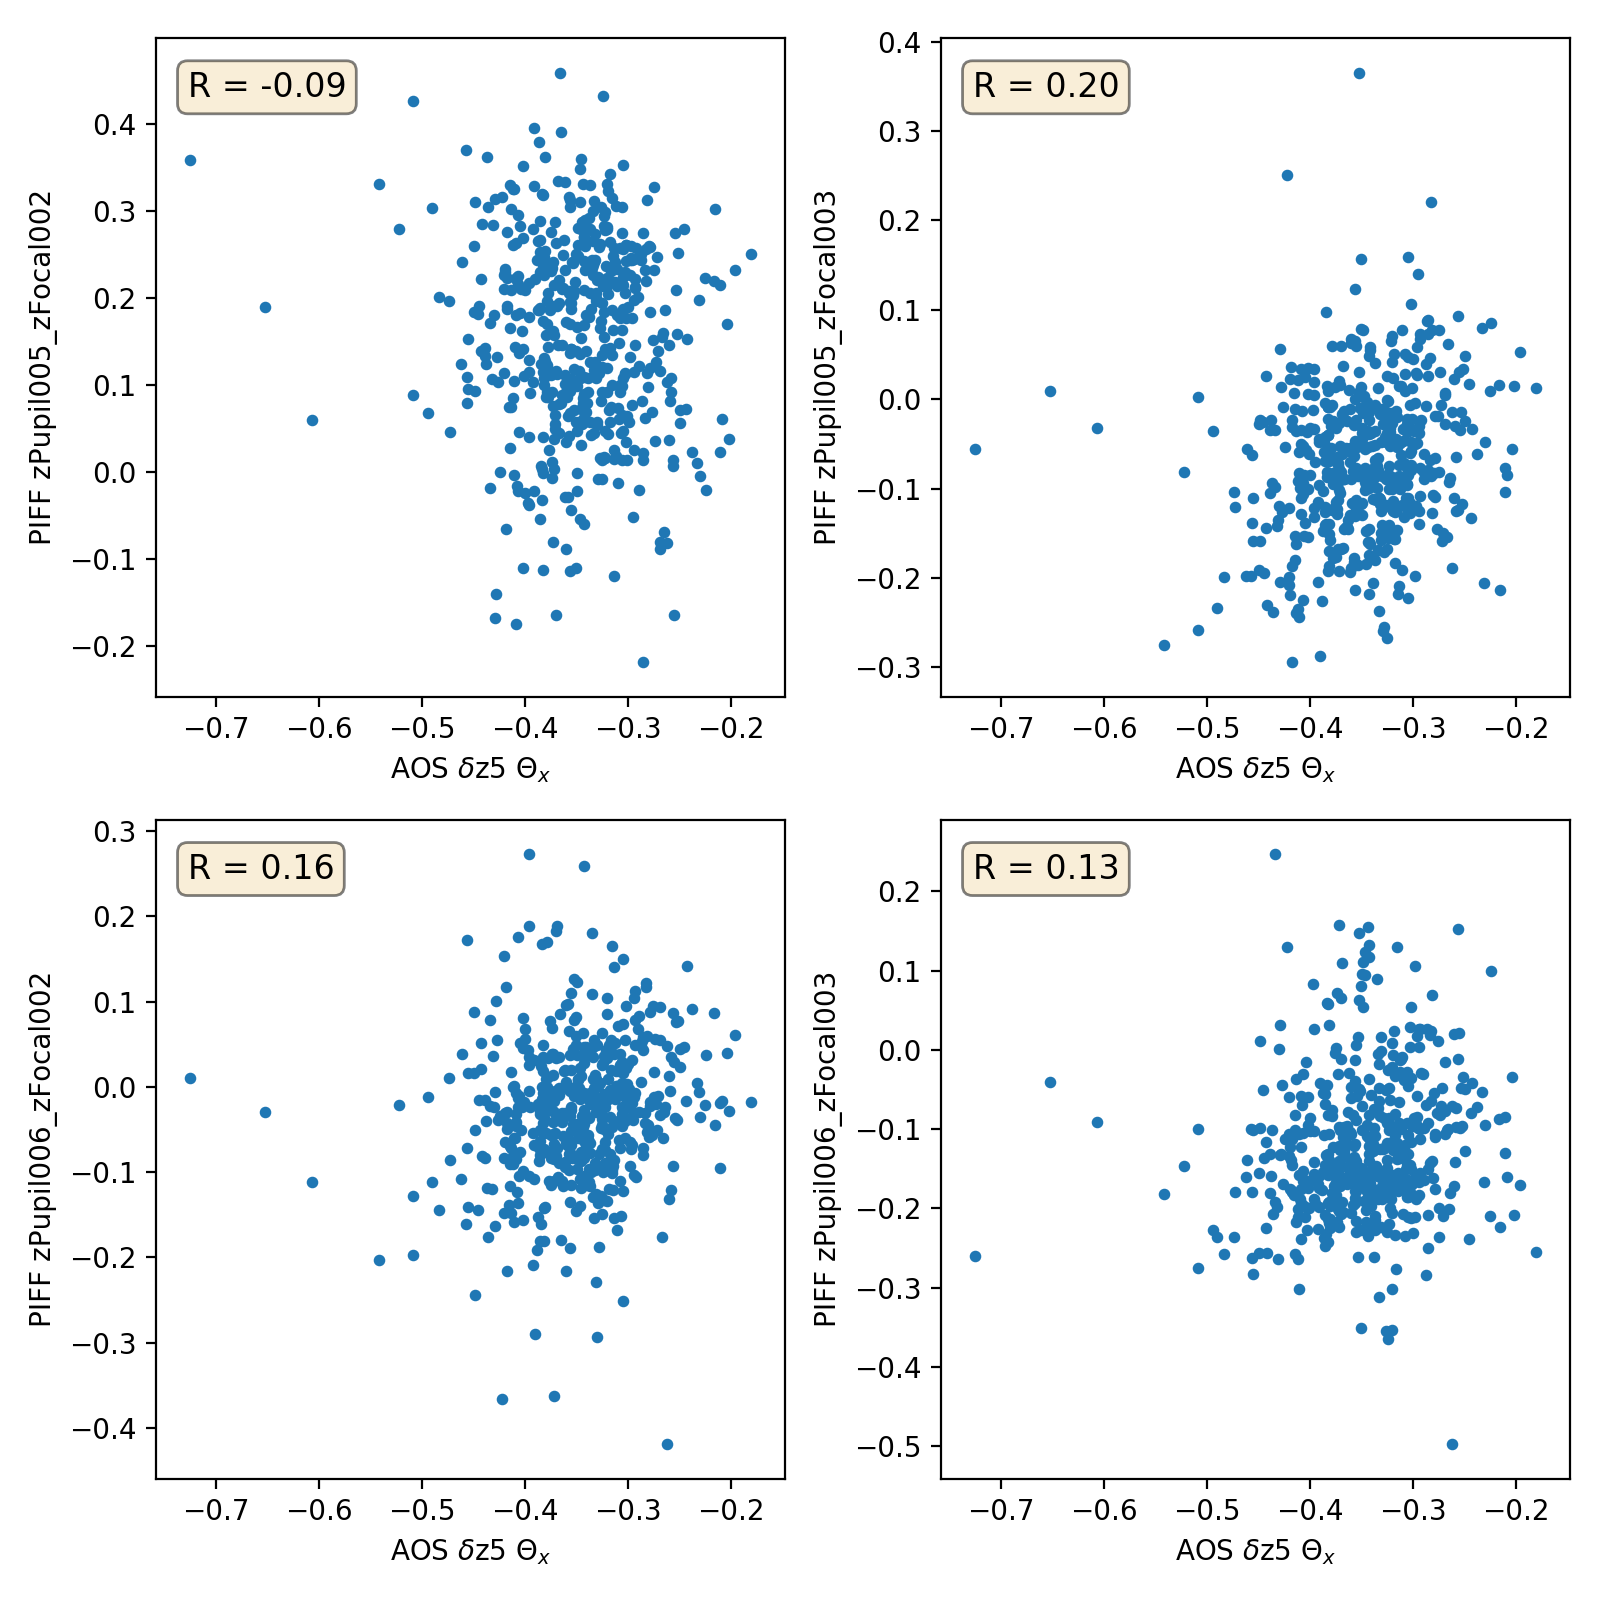

256.65399239543723


In [17]:
f,axa = plt.subplots(2,2,figsize=(8,8))
ax = axa.flatten()

factor = 4500./(0.263/0.015)   #conversion between PIFF ~u/4500.  vs. AOS ~x
print(factor)
piffterms = ['zPupil005_zFocal002','zPupil005_zFocal003','zPupil006_zFocal002','zPupil006_zFocal003']
for i,apiffterm in enumerate(piffterms):
    xval = aospiff['doffrz5thetax']*factor
    yval = aospiff[apiffterm]
    ax[i].scatter(xval,yval,marker='o',s=10.)
    ax[i].set_xlabel("AOS $\delta$z5 $\Theta_x$")
    ax[i].set_ylabel("PIFF %s" % (apiffterm))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)


f.tight_layout()

<IPython.core.display.Javascript object>


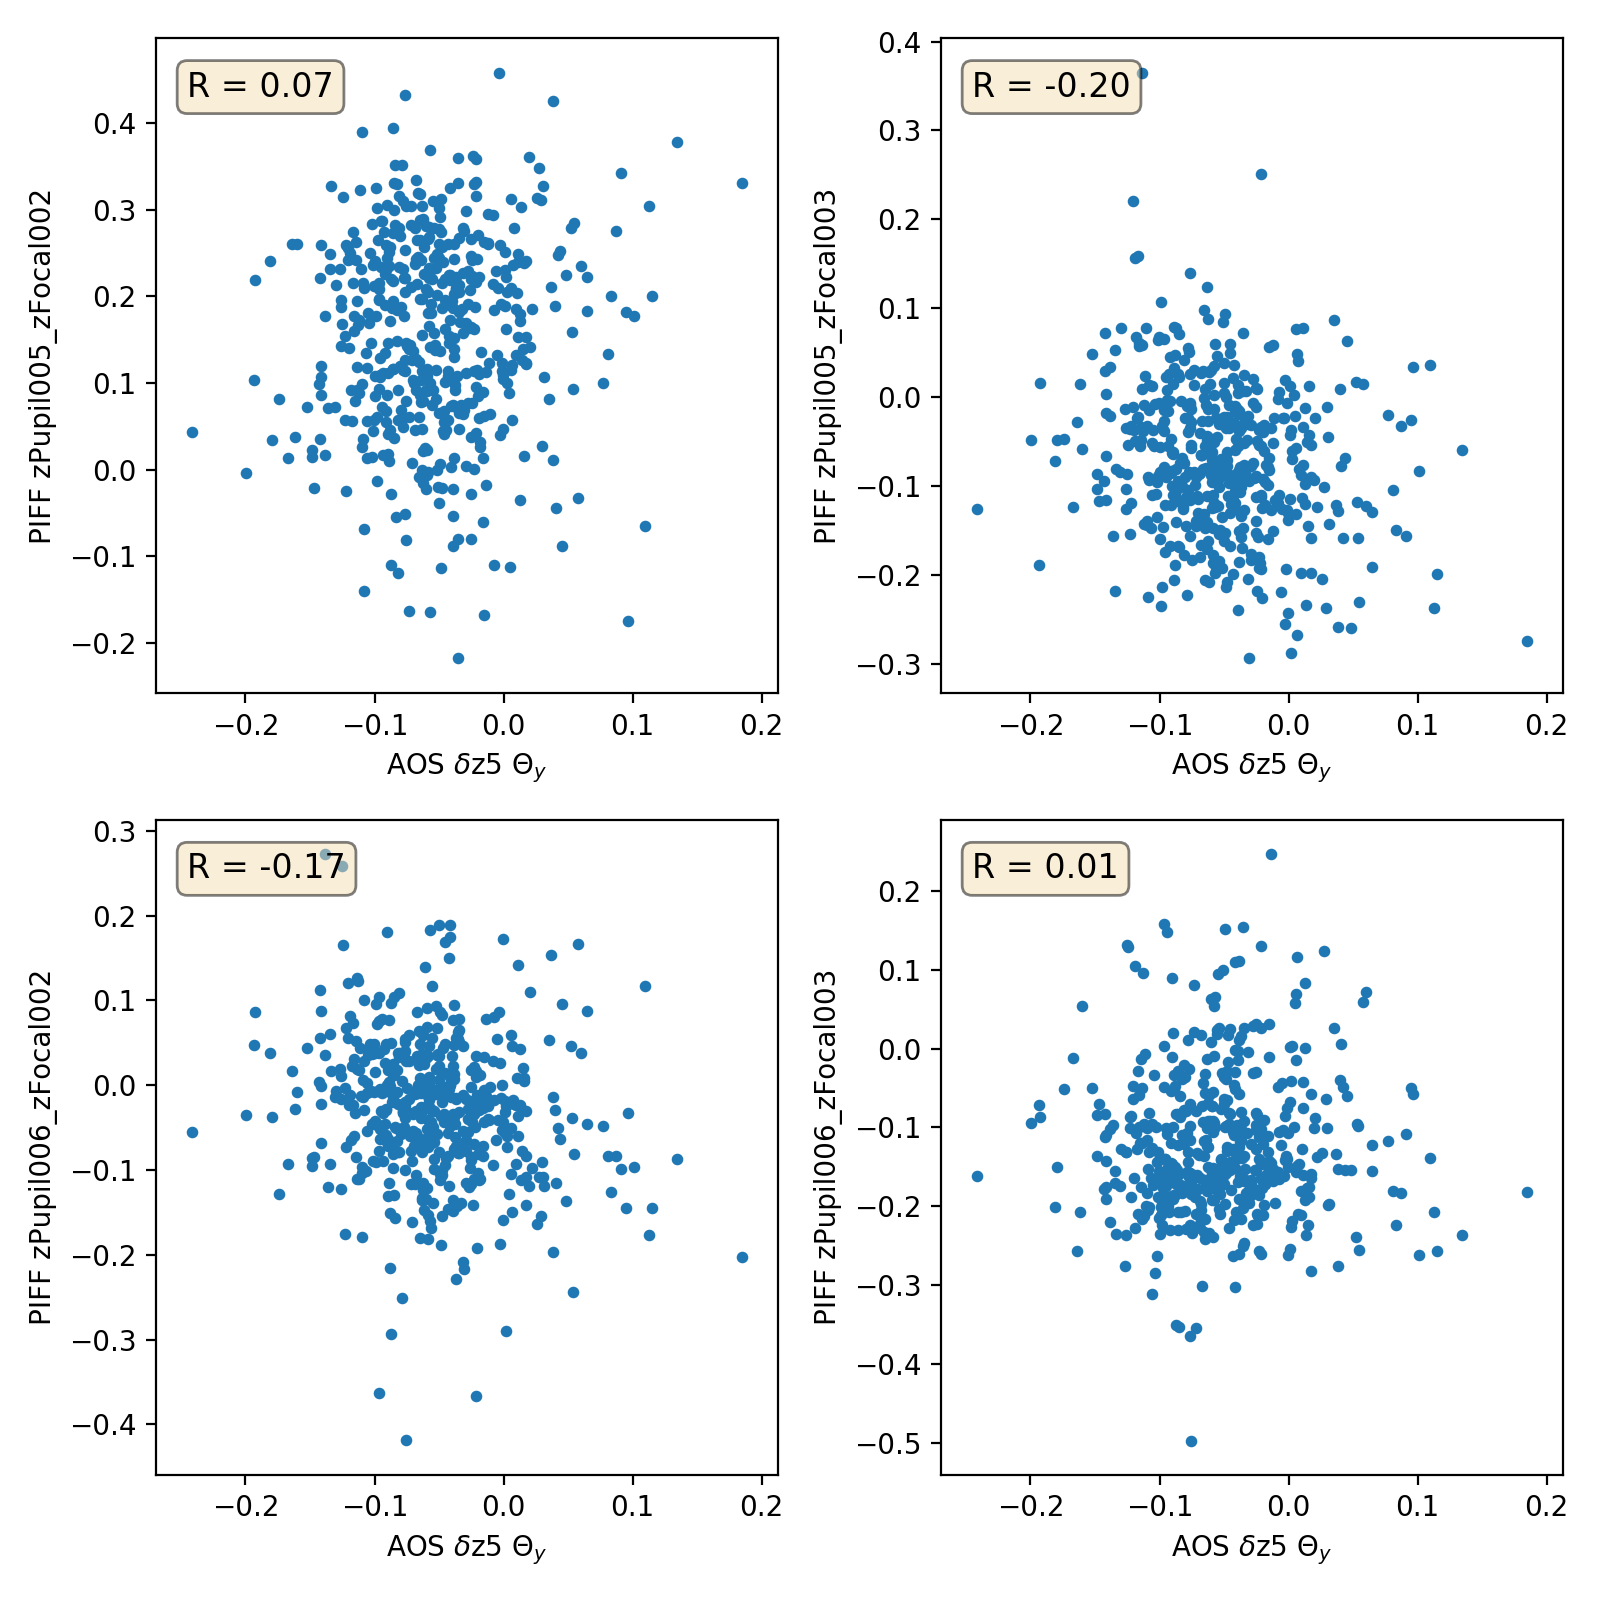

256.65399239543723


In [18]:
f,axa = plt.subplots(2,2,figsize=(8,8))
ax = axa.flatten()

factor = 4500./(0.263/0.015)   #conversion between PIFF ~u/4500.  vs. AOS ~x
print(factor)
piffterms = ['zPupil005_zFocal002','zPupil005_zFocal003','zPupil006_zFocal002','zPupil006_zFocal003']
for i,apiffterm in enumerate(piffterms):
    xval = aospiff['doffrz5thetay']*factor
    yval = aospiff[apiffterm]
    ax[i].scatter(xval,yval,marker='o',s=10.)
    ax[i].set_xlabel("AOS $\delta$z5 $\Theta_y$")
    ax[i].set_ylabel("PIFF %s" % (apiffterm))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)


f.tight_layout()

<IPython.core.display.Javascript object>


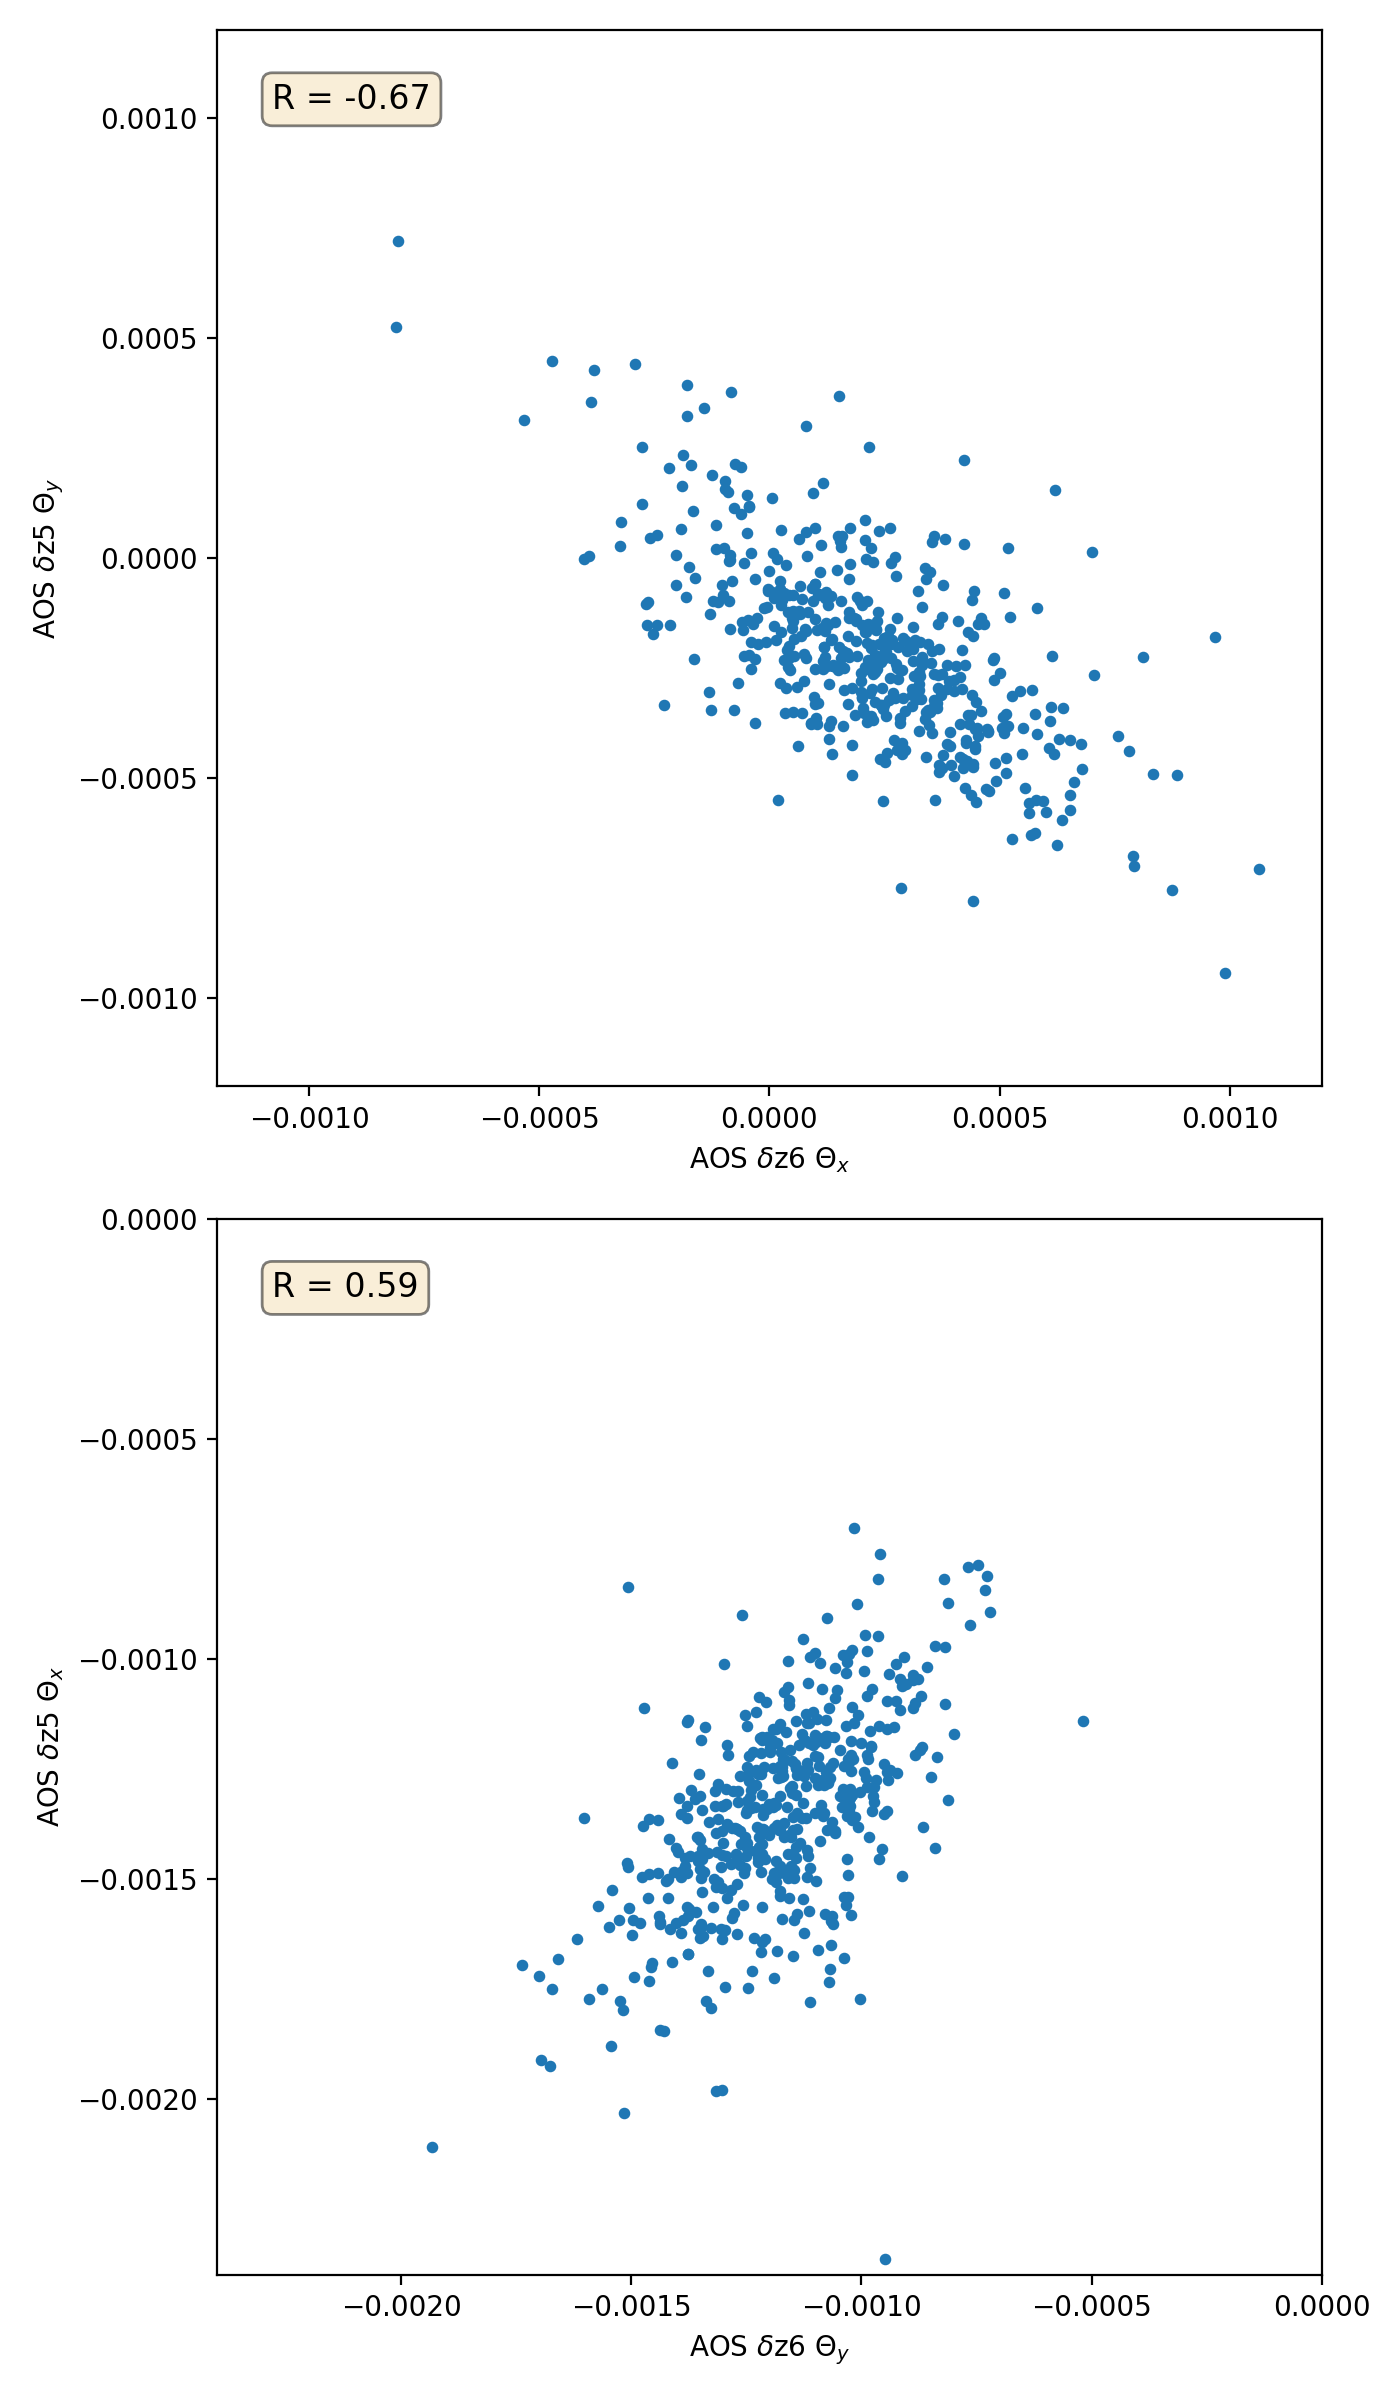

In [19]:
f,ax = plt.subplots(2,1,figsize=(7,12))

xval = aospiff['doffrz6thetax']
yval = aospiff['doffrz5thetay']
ax[0].scatter(xval,yval,marker='o',s=10.)
ax[0].set_xlabel("AOS $\delta$z6 $\Theta_x$")
ax[0].set_ylabel("AOS $\delta$z5 $\Theta_y$")
ax[0].set_ylim(-0.0012,0.0012)
ax[0].set_xlim(-0.0012,0.0012)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax[0].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[0].transAxes, fontsize=12,verticalalignment='top', bbox=props)



xval = aospiff['doffrz6thetay']
yval = aospiff['doffrz5thetax']
ax[1].scatter(xval,yval,marker='o',s=10.)
ax[1].set_xlabel("AOS $\delta$z6 $\Theta_y$")
ax[1].set_ylabel("AOS $\delta$z5 $\Theta_x$")
ax[1].set_ylim(-0.0024,0.0)
ax[1].set_xlim(-0.0024,0.0)
# place a text box in upper left in axes coords
ax[1].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[1].transAxes, fontsize=12,verticalalignment='top', bbox=props)



f.tight_layout()

<IPython.core.display.Javascript object>


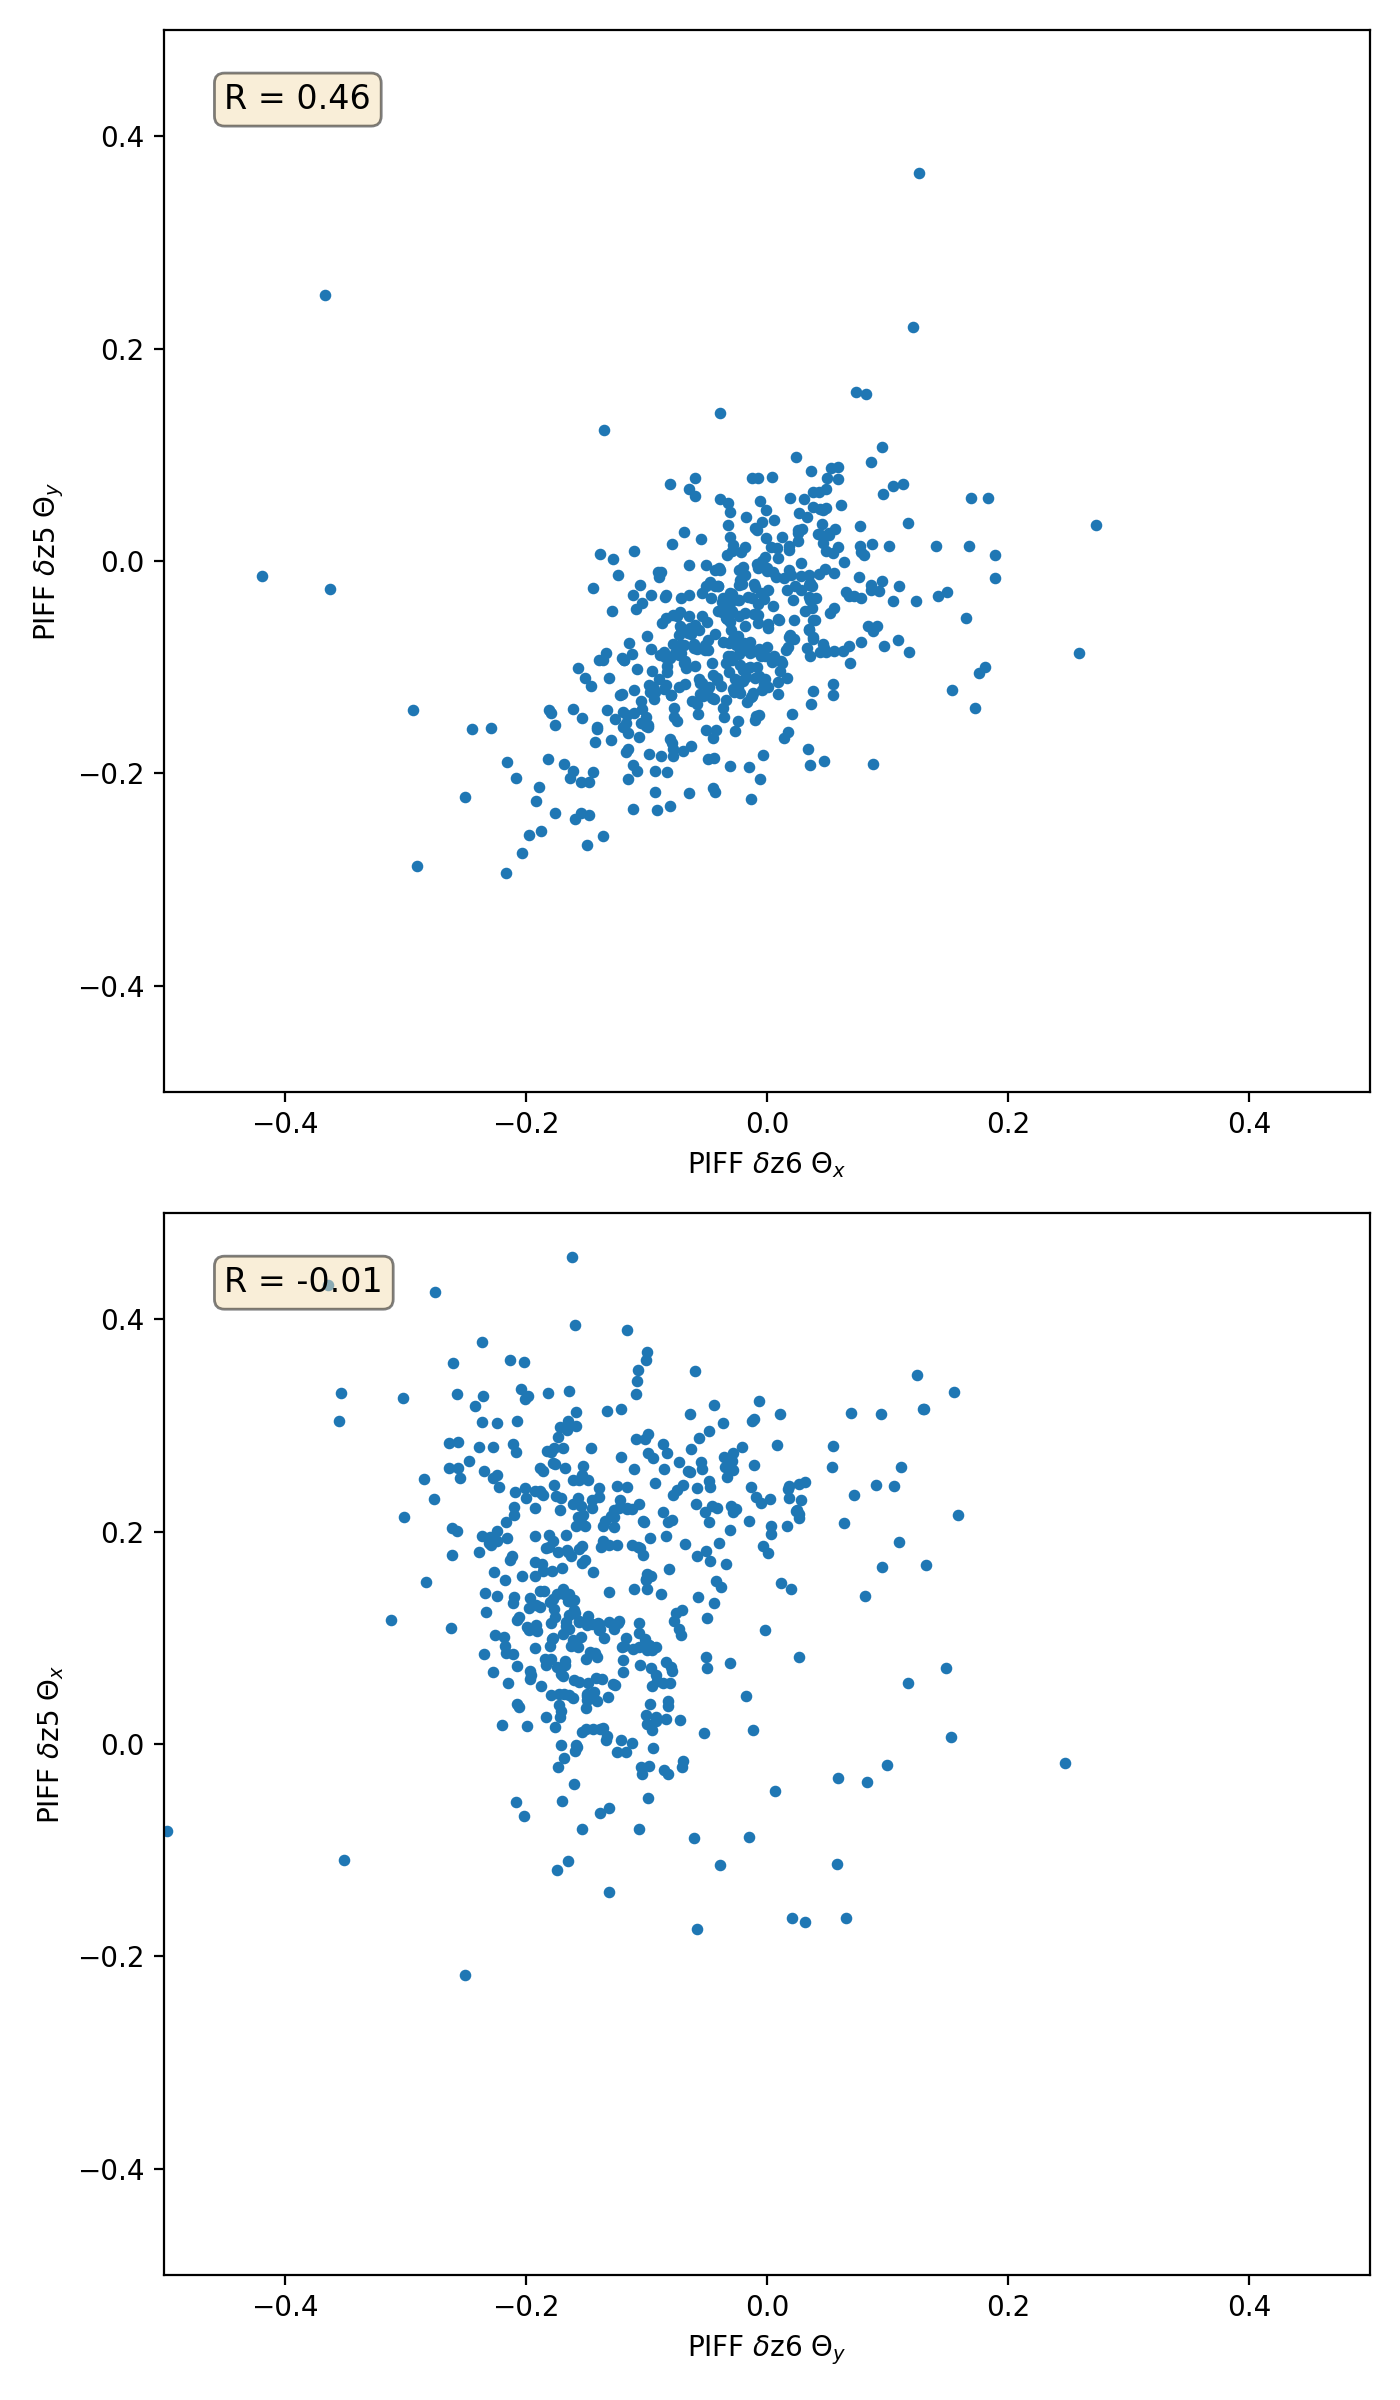

In [20]:
f,ax = plt.subplots(2,1,figsize=(7,12))

xval = aospiff['zPupil006_zFocal002']
yval = aospiff['zPupil005_zFocal003']
ax[0].scatter(xval,yval,marker='o',s=10.)
ax[0].set_xlabel("PIFF $\delta$z6 $\Theta_x$")
ax[0].set_ylabel("PIFF $\delta$z5 $\Theta_y$")
ax[0].set_ylim(-0.5,0.5)
ax[0].set_xlim(-0.5,0.5)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax[0].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[0].transAxes, fontsize=12,verticalalignment='top', bbox=props)



xval = aospiff['zPupil006_zFocal003']
yval = aospiff['zPupil005_zFocal002']
ax[1].scatter(xval,yval,marker='o',s=10.)
ax[1].set_xlabel("PIFF $\delta$z6 $\Theta_y$")
ax[1].set_ylabel("PIFF $\delta$z5 $\Theta_x$")
ax[1].set_ylim(-0.5,0.5)
ax[1].set_xlim(-0.5,0.5)
# place a text box in upper left in axes coords
ax[1].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[1].transAxes, fontsize=12,verticalalignment='top', bbox=props)



f.tight_layout()

<IPython.core.display.Javascript object>


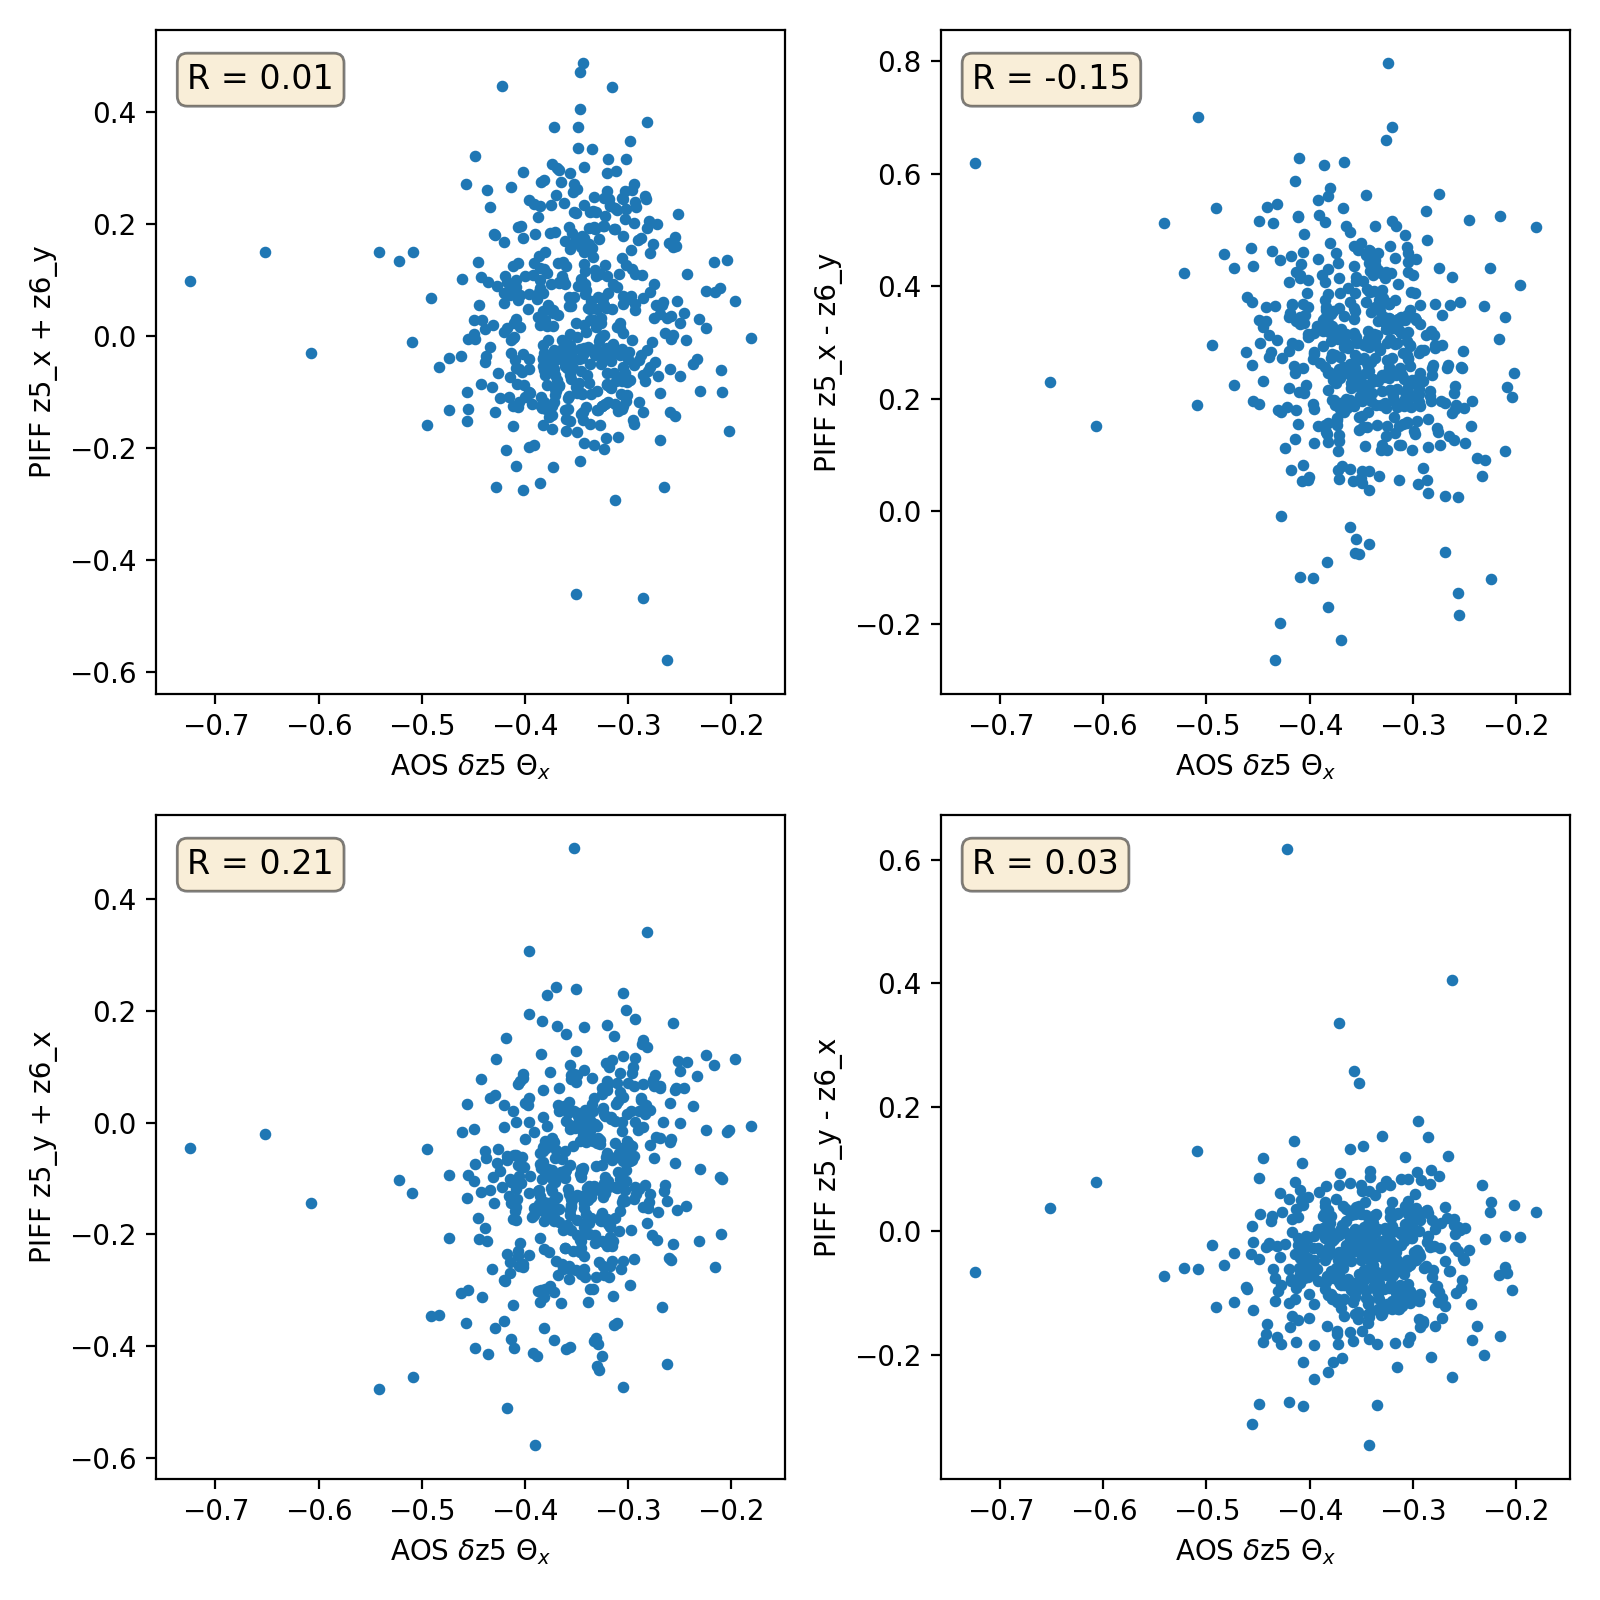

256.65399239543723


In [21]:
# the PIFF fit with 4 dof of z5,6 Theta X,Y for only 2 real dof may be ill posed.  
# Check by forming combinations of PIff z5_x and z6_y, z6_y and z5_x and look for correlations
f,axa = plt.subplots(2,2,figsize=(8,8))
ax = axa.flatten()

factor = 4500./(0.263/0.015)   #conversion between PIFF ~u/4500.  vs. AOS ~x
print(factor)
pifftermsA = ['zPupil005_zFocal002','zPupil005_zFocal002','zPupil005_zFocal003','zPupil005_zFocal003']
pifftermsB = ['zPupil006_zFocal003','zPupil006_zFocal003','zPupil006_zFocal002','zPupil006_zFocal002']
signAB = ['+','-','+','-']
name = ['z5_x + z6_y','z5_x - z6_y','z5_y + z6_x','z5_y - z6_x']


for i in range(4):
    xval = aospiff['doffrz5thetax']*factor
    if signAB[i]=='+':
        yval = aospiff[pifftermsA[i]] + aospiff[pifftermsB[i]]
    else:
        yval = aospiff[pifftermsA[i]] - aospiff[pifftermsB[i]]
    ax[i].scatter(xval,yval,marker='o',s=10.)
    ax[i].set_xlabel("AOS $\delta$z5 $\Theta_x$")
    ax[i].set_ylabel("PIFF %s" % (name[i]))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)


f.tight_layout()

<IPython.core.display.Javascript object>


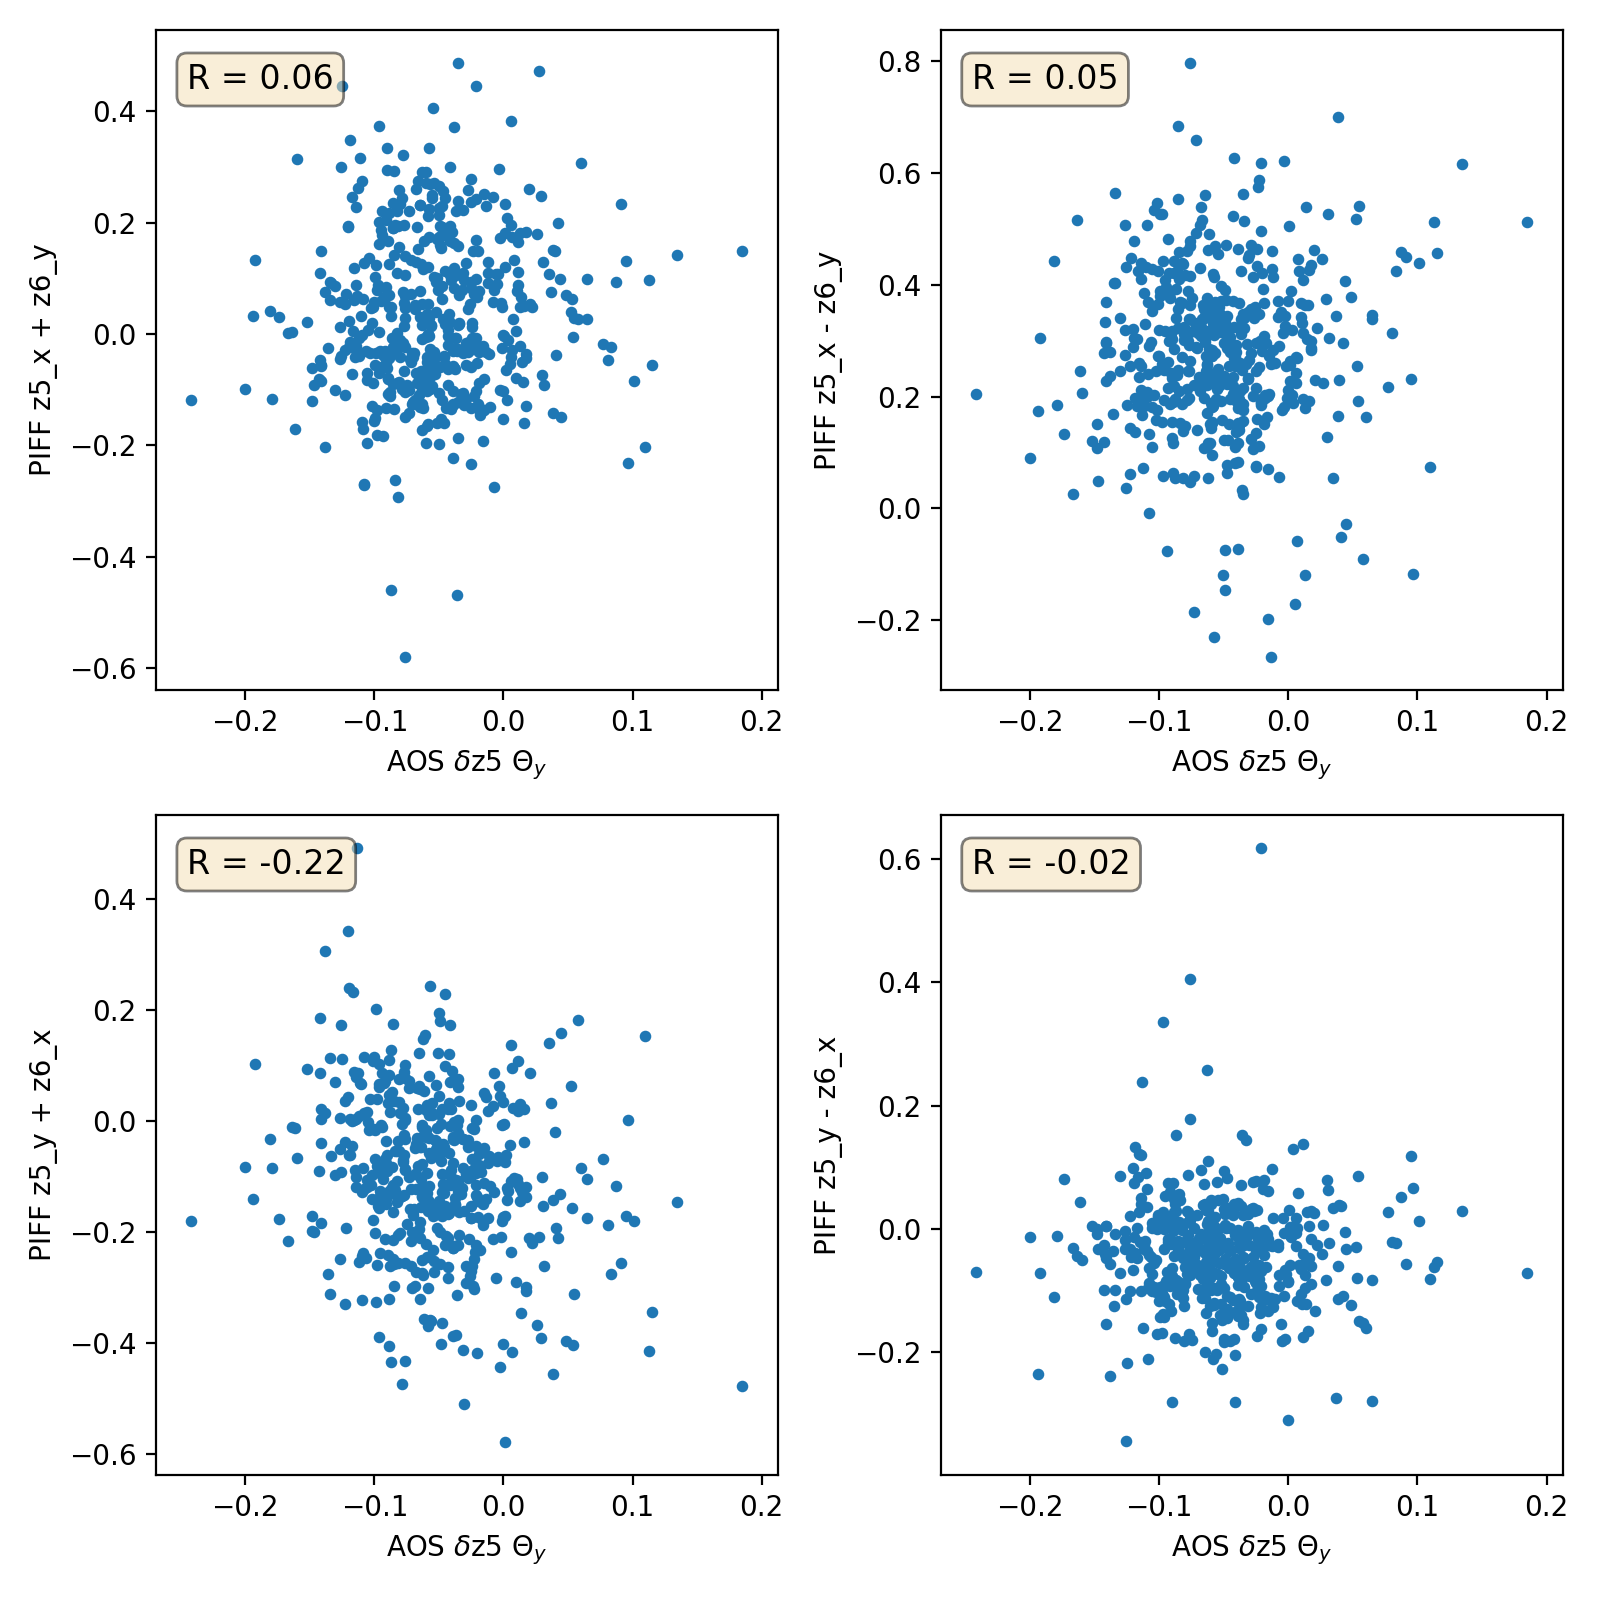

256.65399239543723


In [22]:
# the PIFF fit with 4 dof of z5,6 Theta X,Y for only 2 real dof may be ill posed.  
# Check by forming combinations of PIff z5_x and z6_y, z6_y and z5_x and look for correlations
f,axa = plt.subplots(2,2,figsize=(8,8))
ax = axa.flatten()

factor = 4500./(0.263/0.015)   #conversion between PIFF ~u/4500.  vs. AOS ~x
print(factor)
pifftermsA = ['zPupil005_zFocal002','zPupil005_zFocal002','zPupil005_zFocal003','zPupil005_zFocal003']
pifftermsB = ['zPupil006_zFocal003','zPupil006_zFocal003','zPupil006_zFocal002','zPupil006_zFocal002']
signAB = ['+','-','+','-']
name = ['z5_x + z6_y','z5_x - z6_y','z5_y + z6_x','z5_y - z6_x']


for i in range(4):
    xval = aospiff['doffrz5thetay']*factor
    if signAB[i]=='+':
        yval = aospiff[pifftermsA[i]] + aospiff[pifftermsB[i]]
    else:
        yval = aospiff[pifftermsA[i]] - aospiff[pifftermsB[i]]
    ax[i].scatter(xval,yval,marker='o',s=10.)
    ax[i].set_xlabel("AOS $\delta$z5 $\Theta_y$")
    ax[i].set_ylabel("PIFF %s" % (name[i]))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)


f.tight_layout()

<IPython.core.display.Javascript object>


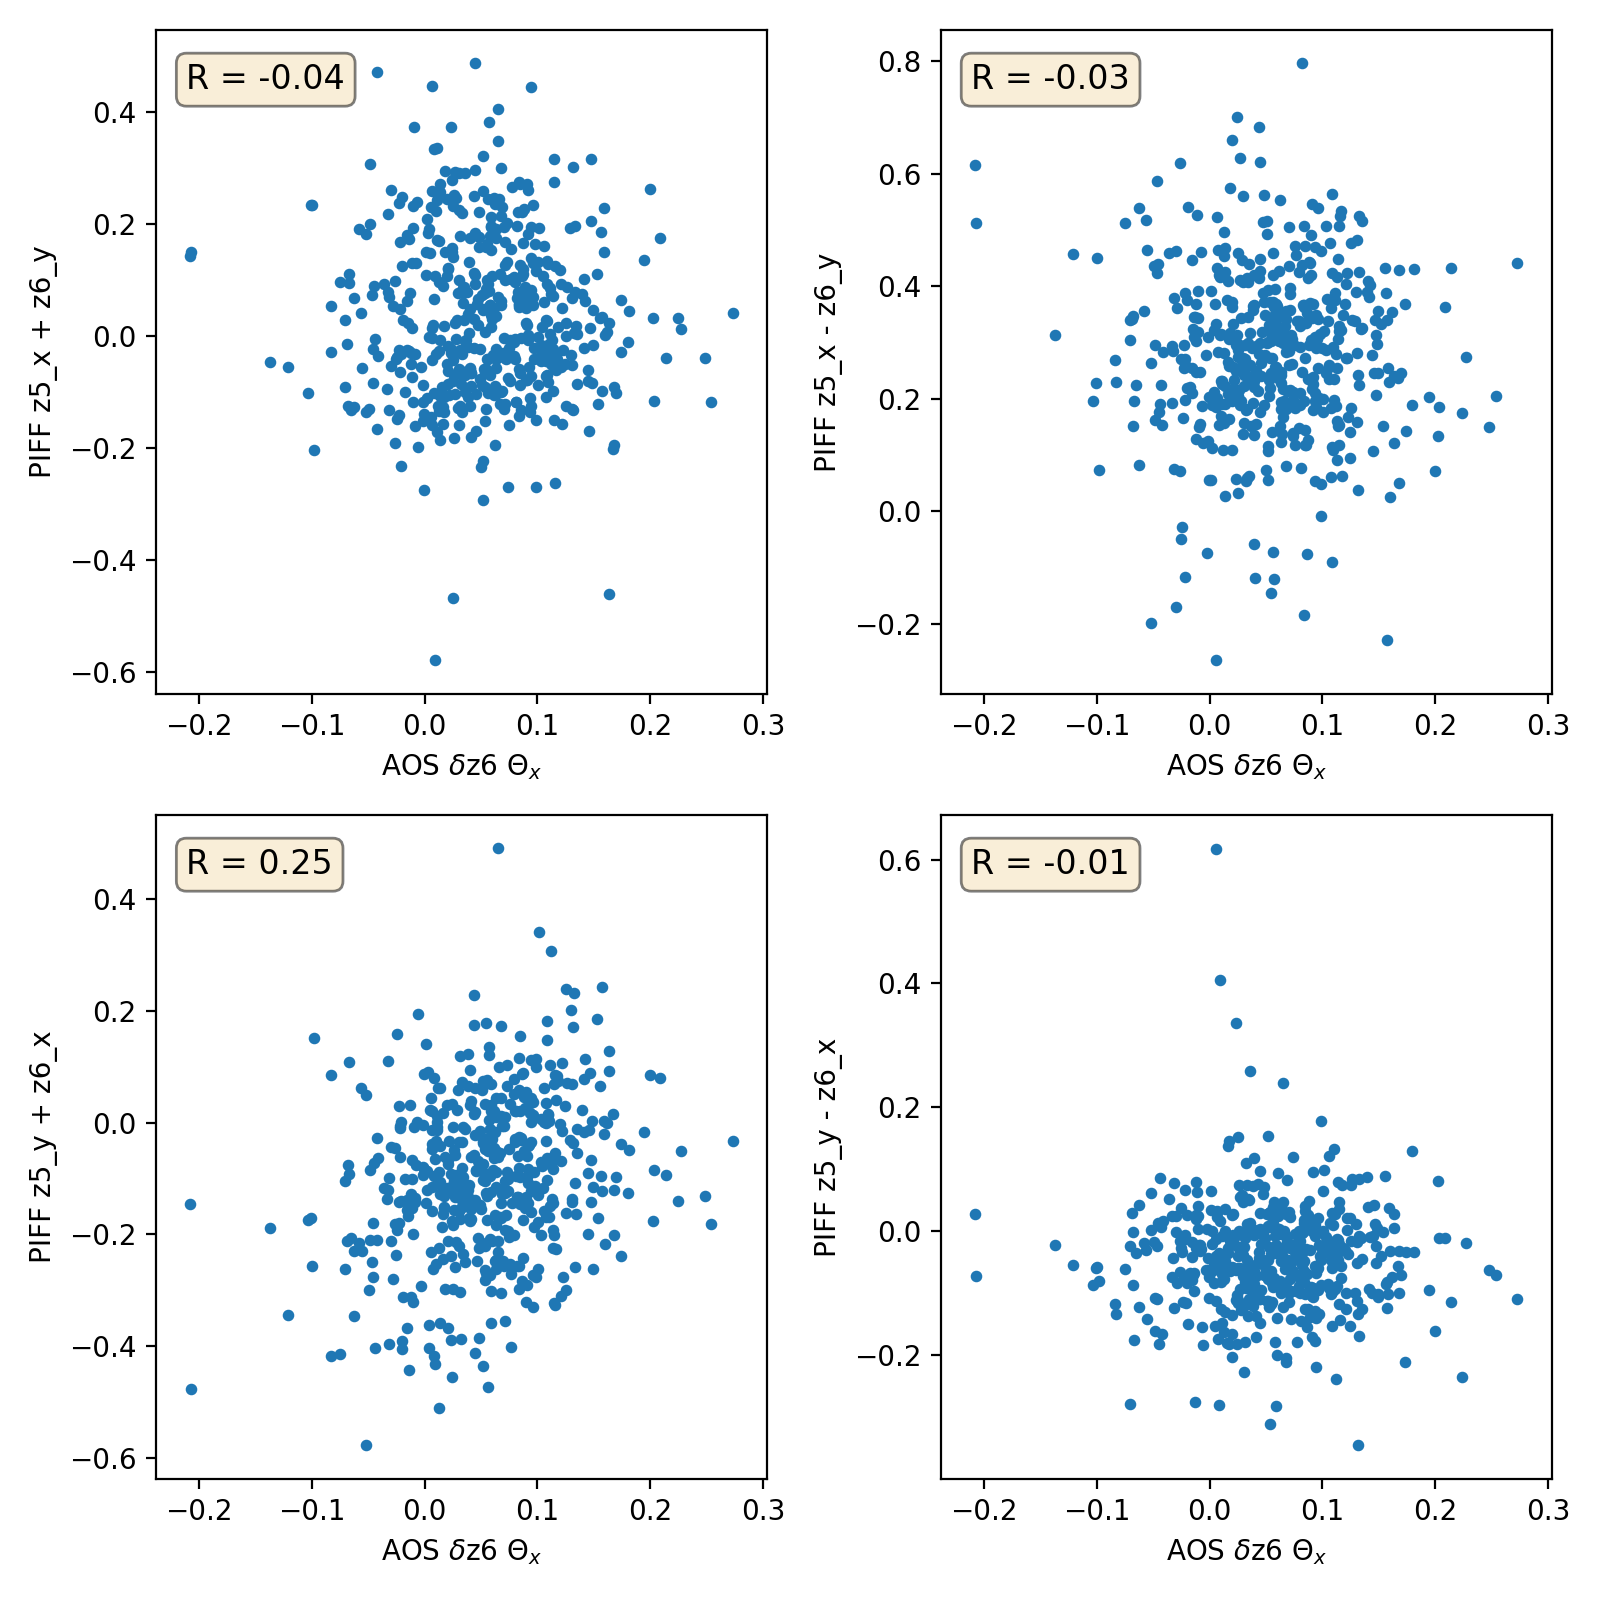

256.65399239543723


In [23]:
# the PIFF fit with 4 dof of z5,6 Theta X,Y for only 2 real dof may be ill posed.  
# Check by forming combinations of PIff z5_x and z6_y, z6_y and z5_x and look for correlations
f,axa = plt.subplots(2,2,figsize=(8,8))
ax = axa.flatten()

factor = 4500./(0.263/0.015)   #conversion between PIFF ~u/4500.  vs. AOS ~x
print(factor)
pifftermsA = ['zPupil005_zFocal002','zPupil005_zFocal002','zPupil005_zFocal003','zPupil005_zFocal003']
pifftermsB = ['zPupil006_zFocal003','zPupil006_zFocal003','zPupil006_zFocal002','zPupil006_zFocal002']
signAB = ['+','-','+','-']
name = ['z5_x + z6_y','z5_x - z6_y','z5_y + z6_x','z5_y - z6_x']


for i in range(4):
    xval = aospiff['doffrz6thetax']*factor
    if signAB[i]=='+':
        yval = aospiff[pifftermsA[i]] + aospiff[pifftermsB[i]]
    else:
        yval = aospiff[pifftermsA[i]] - aospiff[pifftermsB[i]]
    ax[i].scatter(xval,yval,marker='o',s=10.)
    ax[i].set_xlabel("AOS $\delta$z6 $\Theta_x$")
    ax[i].set_ylabel("PIFF %s" % (name[i]))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)


f.tight_layout()

<IPython.core.display.Javascript object>


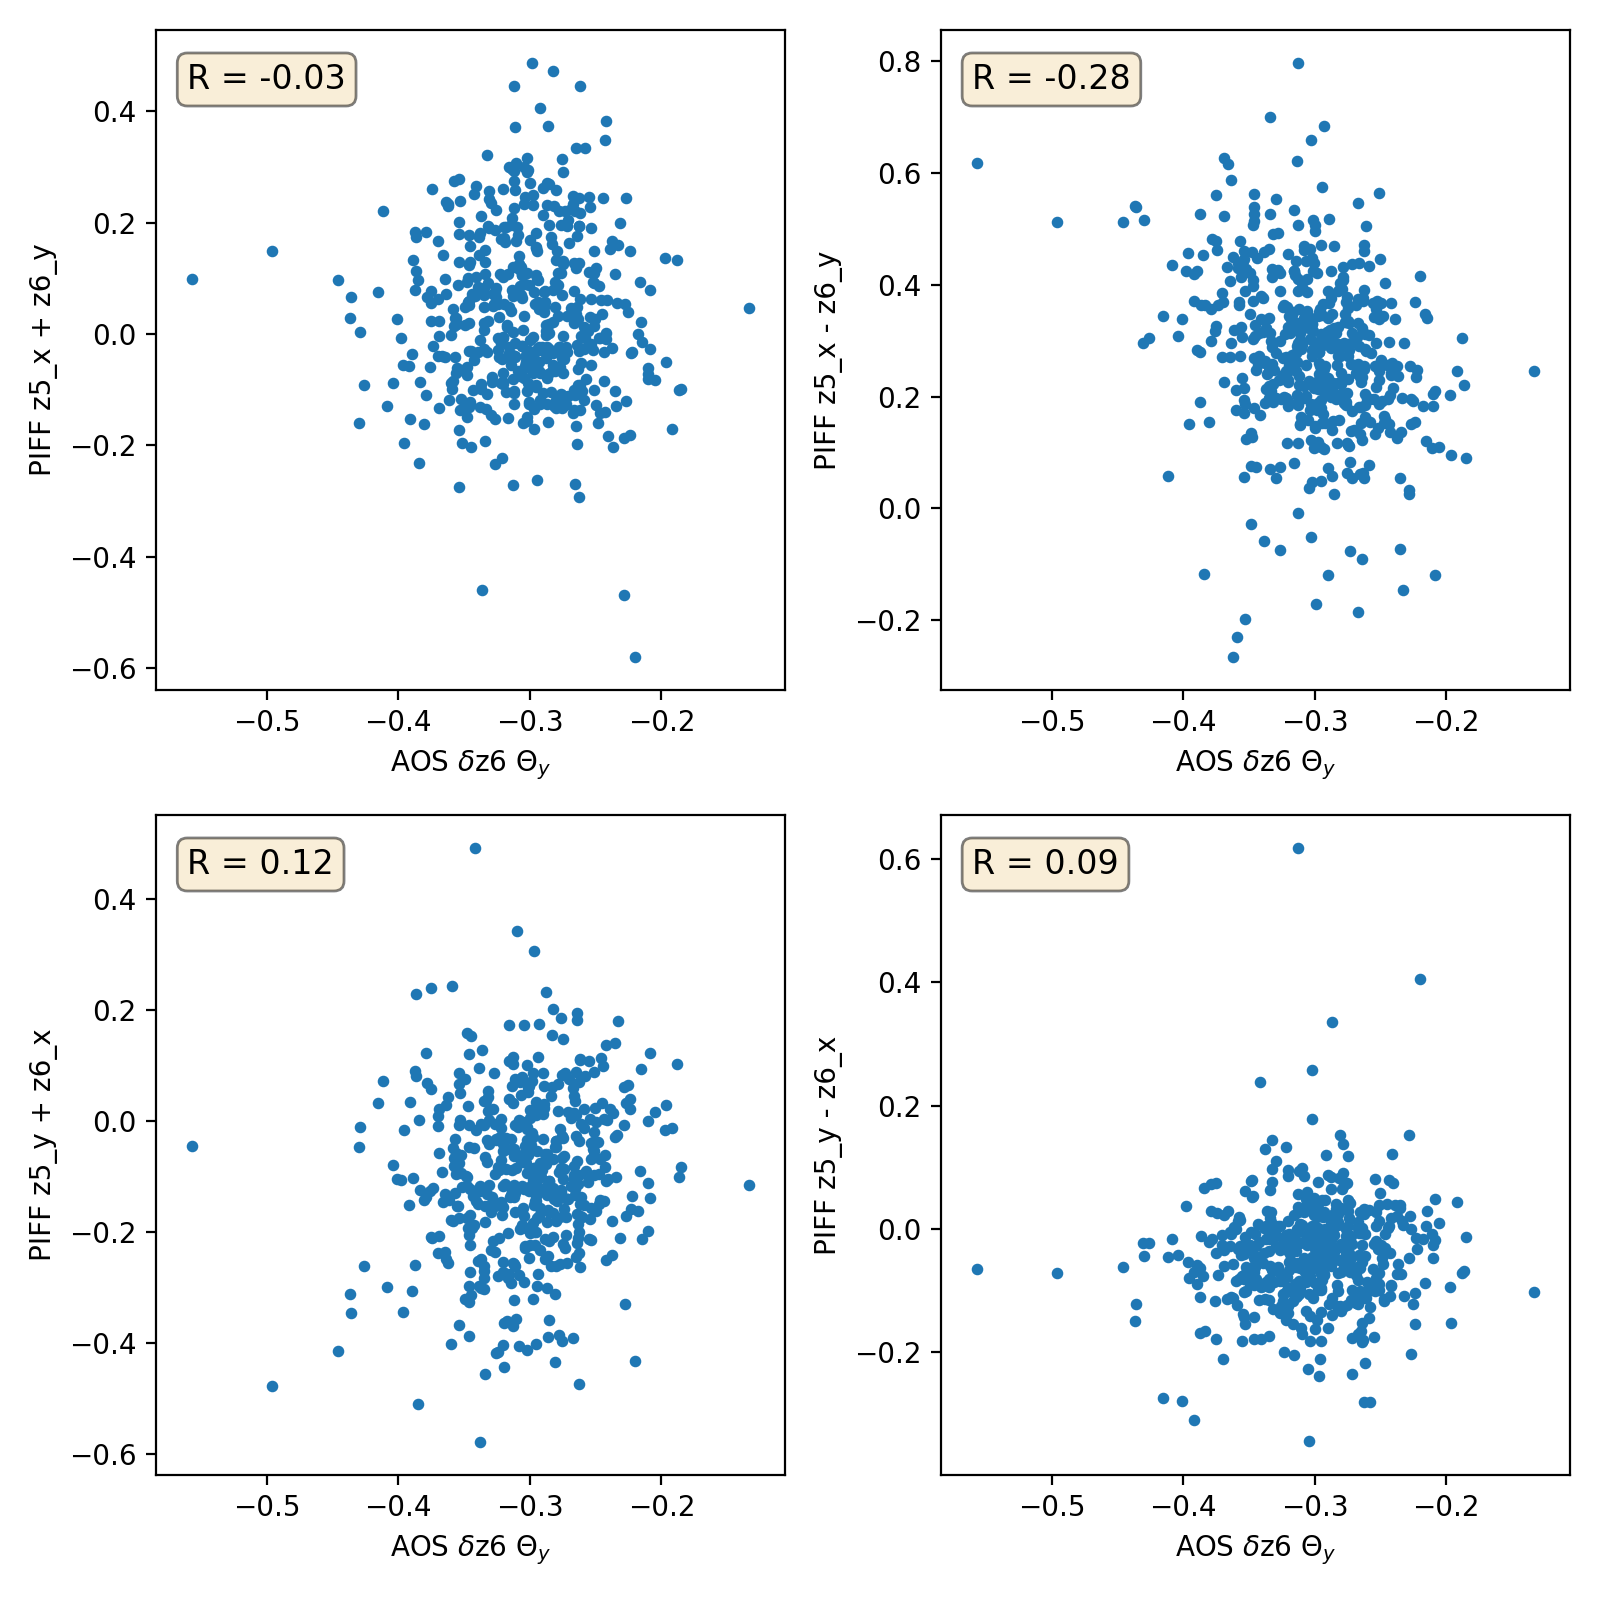

256.65399239543723


In [24]:
# the PIFF fit with 4 dof of z5,6 Theta X,Y for only 2 real dof may be ill posed.  
# Check by forming combinations of PIff z5_x and z6_y, z6_y and z5_x and look for correlations
f,axa = plt.subplots(2,2,figsize=(8,8))
ax = axa.flatten()

factor = 4500./(0.263/0.015)   #conversion between PIFF ~u/4500.  vs. AOS ~x
print(factor)
pifftermsA = ['zPupil005_zFocal002','zPupil005_zFocal002','zPupil005_zFocal003','zPupil005_zFocal003']
pifftermsB = ['zPupil006_zFocal003','zPupil006_zFocal003','zPupil006_zFocal002','zPupil006_zFocal002']
signAB = ['+','-','+','-']
name = ['z5_x + z6_y','z5_x - z6_y','z5_y + z6_x','z5_y - z6_x']


for i in range(4):
    xval = aospiff['doffrz6thetay']*factor
    if signAB[i]=='+':
        yval = aospiff[pifftermsA[i]] + aospiff[pifftermsB[i]]
    else:
        yval = aospiff[pifftermsA[i]] - aospiff[pifftermsB[i]]
    ax[i].scatter(xval,yval,marker='o',s=10.)
    ax[i].set_xlabel("AOS $\delta$z6 $\Theta_y$")
    ax[i].set_ylabel("PIFF %s" % (name[i]))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax[i].text(0.05, 0.95, "R = %.2f" % (np.corrcoef(xval,yval)[0,1]), transform=ax[i].transAxes, fontsize=12,verticalalignment='top', bbox=props)


f.tight_layout()

In [34]:
# add PIFF combinations to the DataFrame
aospiff['z5xMz6y'] = aospiff['zPupil005_zFocal002'] - aospiff['zPupil006_zFocal003']
aospiff['z5yPz6x'] = aospiff['zPupil005_zFocal003'] + aospiff['zPupil006_zFocal002']

(496, 14)


<IPython.core.display.Javascript object>


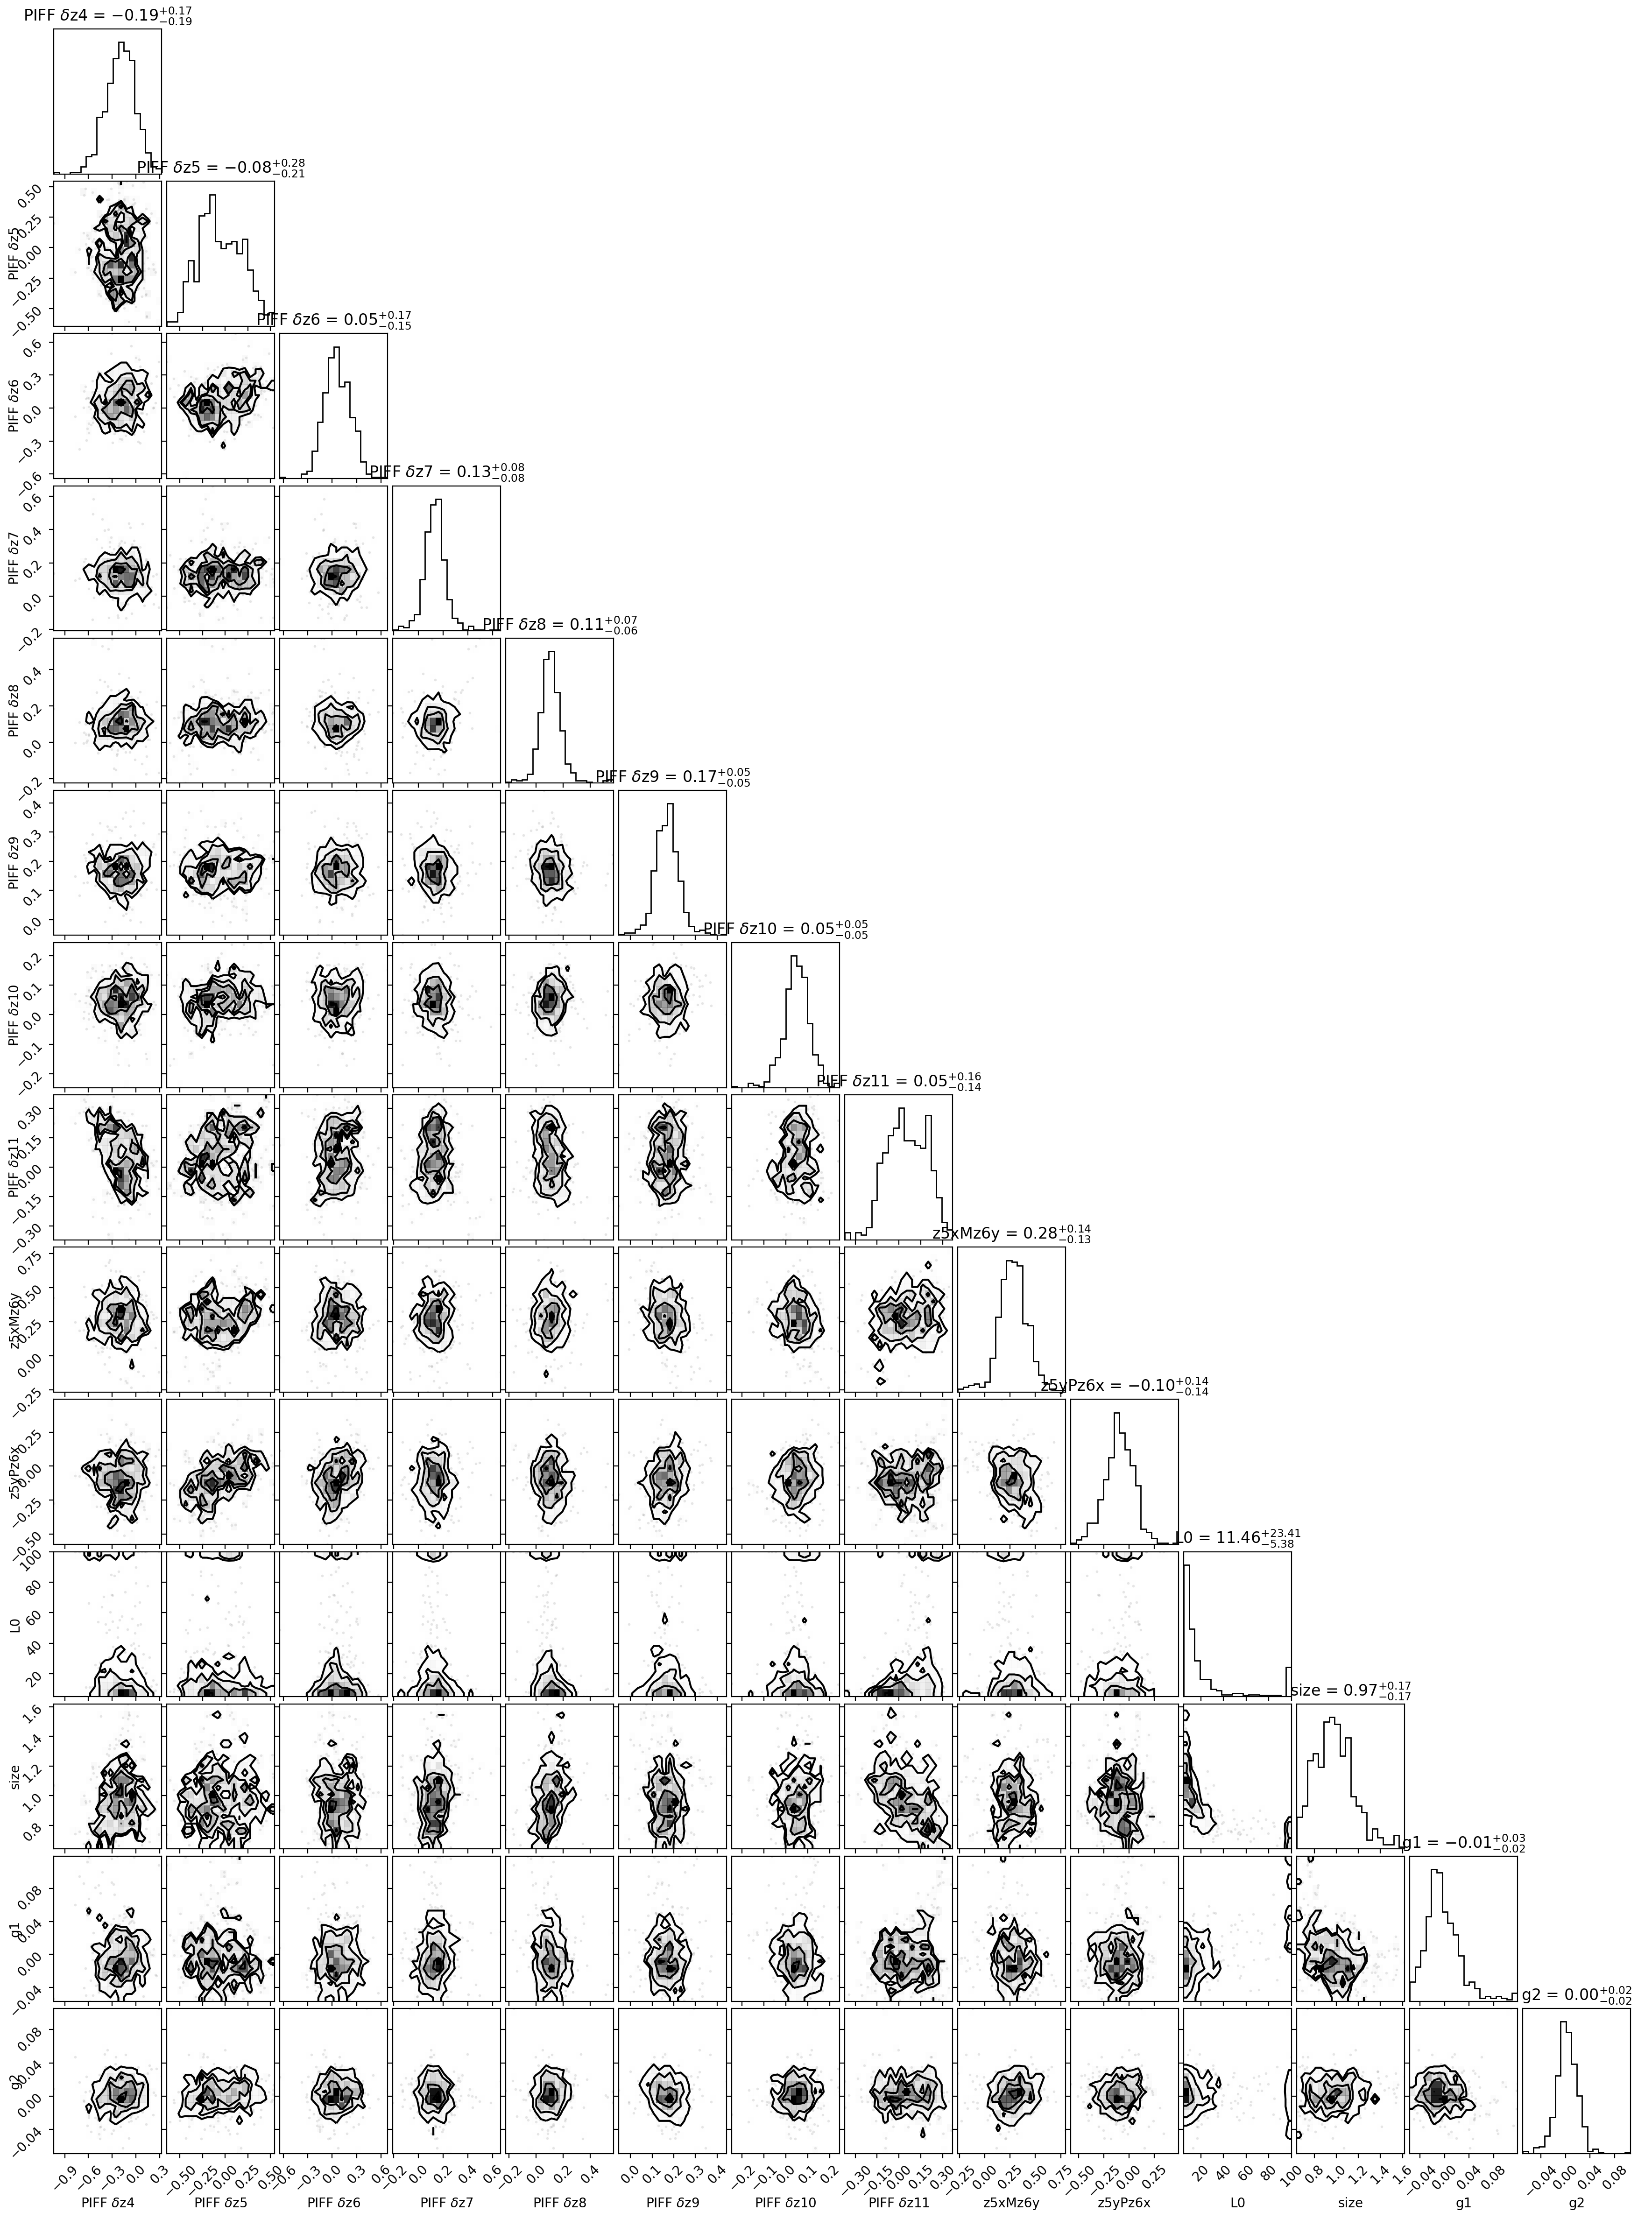

In [38]:
var = []
labels = []
for i in range(4,11+1):
    var.append('zPupil%03d_zFocal%03d' % (i,1))
    labels.append('PIFF $\delta$z%d' % (i))
    
morevars = ['z5xMz6y','z5yPz6x','L0','size','g1','g2']
for avar in morevars:
    var.append(avar)
    labels.append(avar)

data = aospiff[var]
print(data.shape)

figure = corner.corner(data, labels=labels,smooth=.2,
                       show_titles=True, title_kwargs={"fontsize": 12})